In [50]:
import os
import mne
import numpy as np
import cortex
import plotly.graph_objects as go
from scipy import stats
import plotly
from nilearn import datasets
import nibabel as nib
subjects_dir = mne.datasets.sample.data_path() / 'subjects'
labels = mne.read_labels_from_annot(
    'fsaverage', 'HCPMMP1', 'both', subjects_dir=subjects_dir)

Reading labels from parcellation...
   read 181 labels from /home/subbareddy/mne_data/MNE-sample-data/subjects/fsaverage/label/lh.HCPMMP1.annot
   read 181 labels from /home/subbareddy/mne_data/MNE-sample-data/subjects/fsaverage/label/rh.HCPMMP1.annot


In [51]:
fsaverage = datasets.fetch_surf_fsaverage("fsaverage6")
L_labels = nib.load('../afni-nosmooth/tpl-fsaverage6/tpl-fsaverage6_hemi-L_desc-MMP_dseg.label.gii')
R_labels = nib.load('../afni-nosmooth/tpl-fsaverage6/tpl-fsaverage6_hemi-R_desc-MMP_dseg.label.gii')

In [52]:
L_labels.labeltable.get_labels_as_dict()

{0: '???',
 1: 'L_V1_ROI',
 2: 'L_MST_ROI',
 3: 'L_V6_ROI',
 4: 'L_V2_ROI',
 5: 'L_V3_ROI',
 6: 'L_V4_ROI',
 7: 'L_V8_ROI',
 8: 'L_4_ROI',
 9: 'L_3b_ROI',
 10: 'L_FEF_ROI',
 11: 'L_PEF_ROI',
 12: 'L_55b_ROI',
 13: 'L_V3A_ROI',
 14: 'L_RSC_ROI',
 15: 'L_POS2_ROI',
 16: 'L_V7_ROI',
 17: 'L_IPS1_ROI',
 18: 'L_FFC_ROI',
 19: 'L_V3B_ROI',
 20: 'L_LO1_ROI',
 21: 'L_LO2_ROI',
 22: 'L_PIT_ROI',
 23: 'L_MT_ROI',
 24: 'L_A1_ROI',
 25: 'L_PSL_ROI',
 26: 'L_SFL_ROI',
 27: 'L_PCV_ROI',
 28: 'L_STV_ROI',
 29: 'L_7Pm_ROI',
 30: 'L_7m_ROI',
 31: 'L_POS1_ROI',
 32: 'L_23d_ROI',
 33: 'L_v23ab_ROI',
 34: 'L_d23ab_ROI',
 35: 'L_31pv_ROI',
 36: 'L_5m_ROI',
 37: 'L_5mv_ROI',
 38: 'L_23c_ROI',
 39: 'L_5L_ROI',
 40: 'L_24dd_ROI',
 41: 'L_24dv_ROI',
 42: 'L_7AL_ROI',
 43: 'L_SCEF_ROI',
 44: 'L_6ma_ROI',
 45: 'L_7Am_ROI',
 46: 'L_7PL_ROI',
 47: 'L_7PC_ROI',
 48: 'L_LIPv_ROI',
 49: 'L_VIP_ROI',
 50: 'L_MIP_ROI',
 51: 'L_1_ROI',
 52: 'L_2_ROI',
 53: 'L_3a_ROI',
 54: 'L_6d_ROI',
 55: 'L_6mp_ROI',
 56: 'L_6v_ROI',


In [53]:
language_rois = ['AG', 'ATL', 'PTL', 'IFG', 'MFG', 'IFGOrb', 'PCC', 'dmPFC']
AG_ROIs = ['PFm','PGs','PGi','TPOJ2','TPOJ3']
AG_indices = [149, 150, 151, 140, 141]

ATL_indices = [123, 131, 132, 134, 172, 128, 176]
ATL_regions = ['STGa','TGd','TE1a','TE2a','TGv', 'STSda', 'STSva']

ptl_rois = ['STSdp','A5','TPOJ1', 'PSL','STV', 'A4', 'STSvp']
ptl_indices = [129,125,139,25,28, 175, 130]

ifg = ['44', '45', 'IFJa', 'IFSp']
ifg_indices = [74, 75,  79, 81]

mfg = ['55b']
mfg_indices = [12]

ifgorb = ['a47r', 'p47r', 'a9-46v' ]
ifgorb_indices = [77, 171, 85]

pc = ['31', 'PCV', '7m', '23', 'RSC']
pc_indices = [161, 162, 27, 30, 32, 33, 34, 14]

dmpfc = [ '9m', '10d', 'd32']
dmpfc_indices = [ 69, 62, 72]

early_visual_names = ['V1','V2','V3','V3B','V4']
early_visual_indices = [1,4,5,19, 6]

object_visual_names = ['LO1', 'LO2']
object_visual_indices = [20, 21]

face_visual_names = ['FFC','PIT']
face_visual_indices = [18, 22]

scene_visual_names = ['PHA2', 'PHA1', 'PHA3', 'RSC']
scene_visual_indices = [ 155, 127, 14]

middle_temporal_names = ['MT', 'MST', 'LO3', 'FST', 'V3CD']
middle_temporal_indices = [23, 2,159, 157, 158]

early_auditory_rois = ['A1','LBelt','PBelt','MBelt','RI']
early_auditory_indices = [55, 81, 96, 87, 123]

language_indices = [AG_indices, ATL_indices, ptl_indices, ifg_indices, mfg_indices, ifgorb_indices, pc_indices, dmpfc_indices, 
                    early_visual_indices, object_visual_indices, face_visual_indices, scene_visual_indices, middle_temporal_indices, early_auditory_indices]
language_subrois = ['47l','45','IFSp','IFJa','44','TA2','STSva','STSda','STGa','PI','A5','TPOJ2','TPOJ1','STV','STSvp','STSdp','PHT','PSL','PGi','PFm','PGs','PGp','55b','FEF']
language_subindices = [76,75,81,79,74,107,176, 128, 123, 178, 125, 140, 139, 28, 130, 129, 137, 25, 150, 149, 151, 143, 12, 10]

In [54]:
models = ['video','audio','tvlt_video', 'tvlt_audio', 'random','video_audio','meta_joint','meta_video','meta_audio','metajoint-audio','metajoint-video']

In [55]:
normalized_scores_rois = {}
subjects = ['1','3','5']
for eachmodel in models:
    normalized_scores_rois[eachmodel] = []
    for eachsub in subjects:
        temp1 = []
        ceiling_voxcorrs = np.load('./movie10_predictions_results/noise_ceiling/subject_'+str(eachsub)+'_kernel_ridge.npy')
        model_voxcorrs = np.load('imagebind_both/'+str(eachsub)+'/'+eachmodel+'/all/'+'layer_0.npy')
        significant_indices = np.where(np.nan_to_num(ceiling_voxcorrs)<0.05)[0]
        model_voxcorrs[significant_indices] = np.nan
        normalize_across_voxels = model_voxcorrs/ceiling_voxcorrs
        normalize_across_voxels[np.where(normalize_across_voxels<0)[0]] = np.nan
        normalize_across_voxels[np.where(normalize_across_voxels>1)[0]] = 1
        for eachroi in language_indices:
            temp = []
            for subroi in eachroi:
                lhindices = np.where(L_labels.darrays[0].data==subroi)[0]
                rhindices = np.where(R_labels.darrays[0].data==subroi)[0]
                lh_mean = normalize_across_voxels[0:40962][lhindices]
                rh_mean = normalize_across_voxels[40962:][rhindices]
                lh_rh = np.concatenate([lh_mean,rh_mean],axis=0)
                temp.append(np.nanmean(lh_rh))
            temp1.append(np.nanmean(temp))
        normalized_scores_rois[eachmodel].append(np.array(temp1))
normalized_scores_rois = np.array(list(normalized_scores_rois.values()))
print(normalized_scores_rois.shape)

(11, 3, 14)


/tmp/ipykernel_4456/1725706546.py:22: RuntimeWarning:

Mean of empty slice



In [56]:
normalized_scores_vision_rois = {}
subjects = ['1','3','5']
vision_models = ['videomae','vith','vivit','tvlt']
for eachmodel in vision_models:
    normalized_scores_vision_rois[eachmodel] = []
    for eachsub in subjects:
        temp1 = []
        ceiling_voxcorrs = np.load('./movie10_predictions_results/noise_ceiling/subject_'+str(eachsub)+'_kernel_ridge.npy')
        for eachlayer in np.arange(12):
            temp2 = []
            model_voxcorrs = np.load('vivit_movie10/'+str(eachsub)+'/'+eachmodel+'/all/'+str(eachlayer)+'/layer_'+str(eachlayer)+'.npy')
            significant_indices = np.where(np.nan_to_num(ceiling_voxcorrs)<0.05)[0]
            model_voxcorrs[significant_indices] = np.nan
            normalize_across_voxels = model_voxcorrs/ceiling_voxcorrs
            normalize_across_voxels[np.where(normalize_across_voxels<0)[0]] = np.nan
            normalize_across_voxels[np.where(normalize_across_voxels>1)[0]] = 1
            for eachroi in language_indices:
                temp = []
                for subroi in eachroi:
                    lhindices = np.where(L_labels.darrays[0].data==subroi)[0]
                    rhindices = np.where(R_labels.darrays[0].data==subroi)[0]
                    lh_mean = normalize_across_voxels[0:40962][lhindices]
                    rh_mean = normalize_across_voxels[40962:][rhindices]
                    lh_rh = np.concatenate([lh_mean,rh_mean],axis=0)
                    temp.append(np.nanmean(lh_rh))
                temp2.append(np.nanmean(temp))
            temp1.append(np.array(temp2))
        normalized_scores_vision_rois[eachmodel].append(np.array(temp1))
normalized_scores_vision_rois = np.array(list(normalized_scores_vision_rois.values()))
print(normalized_scores_vision_rois.shape)

/tmp/ipykernel_4456/1658865407.py:25: RuntimeWarning:

Mean of empty slice



(4, 3, 12, 14)


In [57]:
normalized_scores_speech_rois = {}
subjects = ['1','3','5']
vision_models = ['wav2vec','ast']
for eachmodel in vision_models:
    normalized_scores_speech_rois[eachmodel] = []
    for eachsub in subjects:
        temp1 = []
        ceiling_voxcorrs = np.load('./movie10_predictions_results_bourn/noise_ceiling/subject_'+str(eachsub)+'_kernel_ridge.npy')
        for eachlayer in np.arange(12):
            temp2 = []
            model_voxcorrs = np.load('movie10_wav2vec/'+str(eachsub)+'/'+eachmodel+'/all/'+str(eachlayer)+'/layer_'+str(eachlayer)+'.npy')
            significant_indices = np.where(np.nan_to_num(ceiling_voxcorrs)<0.05)[0]
            model_voxcorrs[significant_indices] = np.nan
            normalize_across_voxels = model_voxcorrs/ceiling_voxcorrs
            normalize_across_voxels[np.where(normalize_across_voxels<0)[0]] = np.nan
            normalize_across_voxels[np.where(normalize_across_voxels>1)[0]] = 1
            for eachroi in language_indices:
                temp = []
                for subroi in eachroi:
                    lhindices = np.where(L_labels.darrays[0].data==subroi)[0]
                    rhindices = np.where(R_labels.darrays[0].data==subroi)[0]
                    lh_mean = normalize_across_voxels[0:40962][lhindices]
                    rh_mean = normalize_across_voxels[40962:][rhindices]
                    lh_rh = np.concatenate([lh_mean,rh_mean],axis=0)
                    temp.append(np.nanmean(lh_rh))
                temp2.append(np.nanmean(temp))
            temp1.append(np.array(temp2))
        normalized_scores_speech_rois[eachmodel].append(np.array(temp1))
normalized_scores_speech_rois = np.array(list(normalized_scores_speech_rois.values()))
print(normalized_scores_speech_rois.shape)

/tmp/ipykernel_4456/2225217894.py:25: RuntimeWarning:

Mean of empty slice



(2, 3, 12, 14)


In [58]:
normalized_scores = {}
subjects = ['1','3','5']
for eachmodel in models:
    normalized_scores[eachmodel] = []
    for eachsub in subjects:
        temp1 = []
        ceiling_voxcorrs = np.load('./movie10_predictions_results/noise_ceiling/subject_'+str(eachsub)+'_kernel_ridge.npy')
        model_voxcorrs = np.load('imagebind_both/'+str(eachsub)+'/'+eachmodel+'/all/'+'layer_0.npy')
        significant_indices = np.where(np.nan_to_num(ceiling_voxcorrs)<0.05)[0]
        model_voxcorrs[significant_indices] = np.nan
        normalize_across_voxels = model_voxcorrs/ceiling_voxcorrs
        normalize_across_voxels[np.where(normalize_across_voxels<0)[0]] = np.nan
        normalize_across_voxels[np.where(normalize_across_voxels>1)[0]] = 1
        temp1.append(np.nanmean(normalize_across_voxels))
        normalized_scores[eachmodel].append(np.array(temp1))
normalized_scores = np.array(list(normalized_scores.values()))
print(normalized_scores.shape)

(11, 3, 1)


In [59]:
normalized_scores_vision = {}
subjects = ['1','3','5']
vision_models = ['videomae','vith','vivit','tvlt']
for eachmodel in vision_models:
    normalized_scores_vision[eachmodel] = []
    for eachsub in subjects:
        temp1 = []
        ceiling_voxcorrs = np.load('./movie10_predictions_results/noise_ceiling/subject_'+str(eachsub)+'_kernel_ridge.npy')
        for eachlayer in np.arange(12):
            model_voxcorrs = np.load('vivit_movie10/'+str(eachsub)+'/'+eachmodel+'/all/'+str(eachlayer)+'/layer_'+str(eachlayer)+'.npy')
            significant_indices = np.where(np.nan_to_num(ceiling_voxcorrs)<0.05)[0]
            model_voxcorrs[significant_indices] = np.nan
            normalize_across_voxels = model_voxcorrs/ceiling_voxcorrs
            normalize_across_voxels[np.where(normalize_across_voxels<0)[0]] = np.nan
            normalize_across_voxels[np.where(normalize_across_voxels>1)[0]] = 1
            temp1.append(np.nanmean(normalize_across_voxels))
        normalized_scores_vision[eachmodel].append(np.array(temp1))
normalized_scores_vision = np.array(list(normalized_scores_vision.values()))
print(normalized_scores_vision.shape)

(4, 3, 12)


In [60]:
normalized_scores_speech = {}
subjects = ['1','3','5']
vision_models = ['wav2vec','ast']
for eachmodel in vision_models:
    normalized_scores_speech[eachmodel] = []
    for eachsub in subjects:
        temp1 = []
        ceiling_voxcorrs = np.load('./movie10_predictions_results_bourn/noise_ceiling/subject_'+str(eachsub)+'_kernel_ridge.npy')
        for eachlayer in np.arange(12):
            temp2 = []
            model_voxcorrs = np.load('movie10_wav2vec/'+str(eachsub)+'/'+eachmodel+'/all/'+str(eachlayer)+'/layer_'+str(eachlayer)+'.npy')
            significant_indices = np.where(np.nan_to_num(ceiling_voxcorrs)<0.05)[0]
            model_voxcorrs[significant_indices] = np.nan
            normalize_across_voxels = model_voxcorrs/ceiling_voxcorrs
            normalize_across_voxels[np.where(normalize_across_voxels<0)[0]] = np.nan
            normalize_across_voxels[np.where(normalize_across_voxels>1)[0]] = 1
            temp1.append(np.nanmean(normalize_across_voxels))
        normalized_scores_speech[eachmodel].append(np.array(temp1))
normalized_scores_speech = np.array(list(normalized_scores_speech.values()))
print(normalized_scores_speech.shape)

(2, 3, 12)


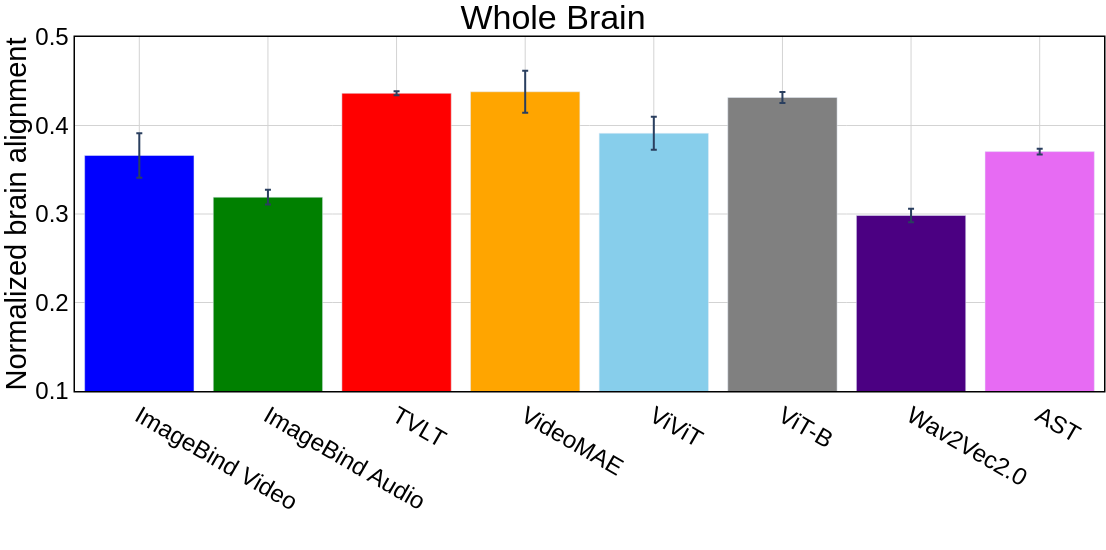

In [21]:
import plotly.graph_objs as go
import plotly
tasks = ['ImageBind Video', 'ImageBind Audio', 'TVLT', 'VideoMAE', 'ViViT', 'ViT-B', 'Wav2Vec2.0','AST']
#random_vector = [0.505, 0.50, 0.498, 0.497, 0.499, 0.499, 0.502, 0.503, 0.503, 0.498]
for i in np.arange(1):
    ibv = np.mean(normalized_scores[0],axis=0)[0]
    iba = np.mean(normalized_scores[1],axis=0)[0]
    tvlt =np.mean(np.mean(normalized_scores_vision[3],axis=0))
    vmae =np.mean(np.mean(normalized_scores_vision[2],axis=0))
    viv = np.mean(np.mean(normalized_scores_vision[0],axis=0))
    vit = np.mean(np.mean(normalized_scores_vision[1],axis=0))
    wav = np.mean(np.mean(normalized_scores_speech[0],axis=1))
    ast = np.mean(np.mean(normalized_scores_speech[1],axis=1))
    

    values = [ibv, iba, tvlt, vmae, viv, vit, wav, ast]
    stderr = [stats.sem(normalized_scores[0], axis=0, ddof=0)[0],stats.sem(normalized_scores[1], axis=0, ddof=0)[0],
              stats.sem(np.mean(normalized_scores_vision, axis=2),axis=1, ddof=0)[3],
              stats.sem(np.mean(normalized_scores_vision, axis=2),axis=1, ddof=0)[2],
              stats.sem(np.mean(normalized_scores_vision, axis=2),axis=1, ddof=0)[0],stats.sem(np.mean(normalized_scores_vision, axis=2),axis=1, ddof=0)[1],
              stats.sem(normalized_scores_speech[0][0],axis=0, ddof=0),stats.sem(normalized_scores_speech[1][0],axis=0, ddof=0)]

    trace1 = go.Bar(
       x = tasks,
       y = values,
       error_y=dict(
                type='data', # value of error bar given in data coordinates
                thickness=2,
                width=3,
                array=stderr,
                visible=True),
      #width=0.1,
        marker=dict(color=['blue','green','red','orange','skyblue','grey','indigo','rgb(231,107,243)', '#8C564B','#ffe4b2','#b2d8b2','cyan','lightblue', 'tan']),
       name = '',
            textposition='outside',textfont_size=30,textfont_color='red'
    )

    data = [trace1]
    layout = go.Layout(barmode = 'group')
    fig = go.Figure(data = data, layout = layout)
    fig.update_layout(bargap=0.15,bargroupgap=0.0, xaxis_title='',
                       yaxis_title='Normalized brain alignment', width=700,height=550, font=dict(
            size=24,
            color='#000000'
        )
    ,title={
            'text': "Whole Brain",
                           'y':0.99,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'}, plot_bgcolor='rgba(0,0,0,0)',showlegend=False, legend=dict(
        yanchor="top",
        y=1.5,
        xanchor="left",
        x=0.01,
        bgcolor='rgba(0,0,0,0)', orientation="h", 
        font=dict(
                size=20,
            )
    ), margin=go.layout.Margin(
            l=0, #left margin
            r=0, #right margin
            b=0, #bottom margin
            t=37  #top margin
        ))
    fig.update_yaxes(range=[0.1, 0.5], tick0=0.1, dtick=0.1, tickmode = 'linear', showline=True, mirror=True, linewidth=1.5, linecolor='black', gridcolor='lightgray')
    #fig.update_yaxes(ticksuffix="%")
    fig.update_xaxes(tick0=0, showline=True, showticklabels=True, mirror=True, linewidth=1.5, linecolor='black', gridcolor='lightgray')

    plotly.io.write_image(fig, 'whole_brain_normalized_alignment_barplot.pdf', format='pdf')
    fig.show()

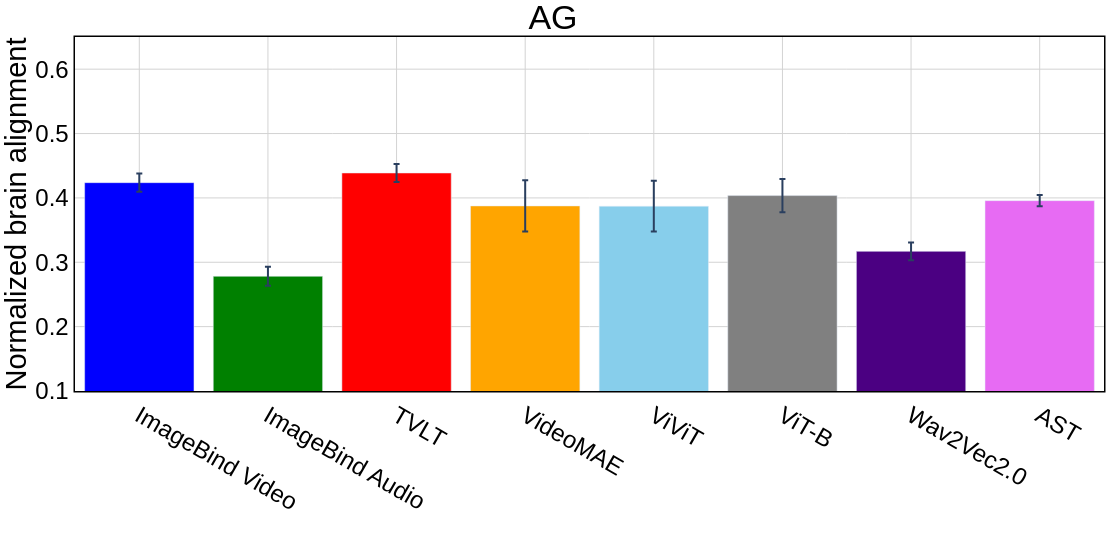

In [26]:
import plotly.graph_objs as go
import plotly
tasks = ['ImageBind Video', 'ImageBind Audio', 'TVLT', 'VideoMAE', 'ViViT', 'ViT-B', 'Wav2Vec2.0','AST']
#random_vector = [0.505, 0.50, 0.498, 0.497, 0.499, 0.499, 0.502, 0.503, 0.503, 0.498]
for i in np.arange(1):
    ibv = np.mean(normalized_scores_rois[0],axis=0)[0]
    iba = np.mean(normalized_scores_rois[1],axis=0)[0]
    tvlt = np.mean(np.mean(normalized_scores_vision_rois[3],axis=0),axis=0)[0]
    vmae = np.mean(np.mean(normalized_scores_vision_rois[2],axis=0),axis=0)[0]
    viv = np.mean(np.mean(normalized_scores_vision_rois[0],axis=0),axis=0)[0]
    vit = np.mean(np.mean(normalized_scores_vision_rois[1],axis=0),axis=0)[0]
    wav = np.mean(np.mean(normalized_scores_speech_rois[0],axis=0),axis=0)[0]
    ast = np.mean(np.mean(normalized_scores_speech_rois[1],axis=0),axis=0)[0]
    

    values = [ibv, iba, tvlt, vmae, viv, vit, wav, ast]
    stderr = [stats.sem(normalized_scores_rois[0], axis=0, ddof=0)[0],stats.sem(normalized_scores_rois[1], axis=0, ddof=0)[0],
              stats.sem(np.mean(normalized_scores_vision_rois, axis=2)[3],axis=0, ddof=0)[0],
              stats.sem(np.mean(normalized_scores_vision_rois, axis=2)[2],axis=0, ddof=0)[0],
              stats.sem(np.mean(normalized_scores_vision_rois, axis=2)[0],axis=0, ddof=0)[0],stats.sem(np.mean(normalized_scores_vision_rois, axis=2)[1],axis=0, ddof=0)[0],
              stats.sem(normalized_scores_speech_rois[0][0][:,0],axis=0, ddof=0),
             stats.sem(normalized_scores_speech_rois[1][0][:,0],axis=0, ddof=0)]

    trace1 = go.Bar(
       x = tasks,
       y = values,
       error_y=dict(
                type='data', # value of error bar given in data coordinates
                thickness=2,
                width=3,
                array=stderr,
                visible=True),
      #width=0.1,
        marker=dict(color=['blue','green','red','orange','skyblue','grey','indigo','rgb(231,107,243)', '#8C564B','#ffe4b2','#b2d8b2','cyan','lightblue', 'tan']),
       name = '',
            textposition='outside',textfont_size=30,textfont_color='red'
    )

    data = [trace1]
    layout = go.Layout(barmode = 'group')
    fig = go.Figure(data = data, layout = layout)
    fig.update_layout(bargap=0.15,bargroupgap=0.0, xaxis_title='',
                       yaxis_title='Normalized brain alignment', width=700,height=550, font=dict(
            size=24,
            color='#000000'
        )
    ,title={
            'text': "AG",
                           'y':0.99,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'}, plot_bgcolor='rgba(0,0,0,0)',showlegend=False, legend=dict(
        yanchor="top",
        y=1.5,
        xanchor="left",
        x=0.01,
        bgcolor='rgba(0,0,0,0)', orientation="h", 
        font=dict(
                size=20,
            )
    ), margin=go.layout.Margin(
            l=0, #left margin
            r=0, #right margin
            b=0, #bottom margin
            t=37  #top margin
        ))
    fig.update_yaxes(range=[0.1, 0.65], tick0=0.1, dtick=0.1, tickmode = 'linear', showline=True, mirror=True, linewidth=1.5, linecolor='black', gridcolor='lightgray')
    #fig.update_yaxes(ticksuffix="%")
    fig.update_xaxes(tick0=0, showline=True, showticklabels=True, mirror=True, linewidth=1.5, linecolor='black', gridcolor='lightgray')

    plotly.io.write_image(fig, 'language_brain_normalized_alignment_barplot.pdf', format='pdf')
    fig.show()

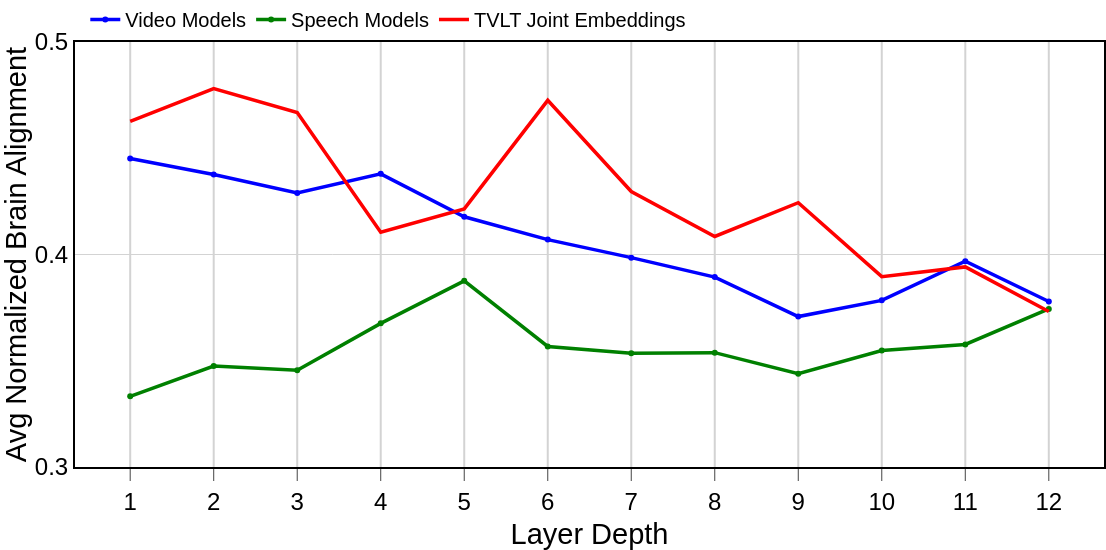

In [92]:
significance = [[1,2,3,4,5,6,7,8,9,10,11,12],[1,2,3,4,5,6,7,8,9,10,11,12],[1,2,3,4,5,6,7,8,9,10,11,12],
[1,2,3,4,5,6,7,8,9,10,11,12],[1,2,3,4,5,6,7,8,9,10,11,12]]
for i in np.arange(1):
    fig = go.Figure()
    
    fig.add_trace(go.Scatter(x=np.arange(1,13), y=np.mean(np.mean(normalized_scores_vision_rois[0:3],axis=0),axis=0)[:,0], name='Video Models',
                             line=dict(color='blue', width=3.5),mode='lines+markers', error_y = dict(
                type ='data',
                array = [stats.sem(normalized_scores_vision_rois[0][:,:], axis=0, ddof=0)],thickness=2,width=3,
                visible = True)
        ))
    fig.add_trace(go.Scatter(x=np.arange(1,13), y=np.mean(np.mean(normalized_scores_speech_rois[0:2],axis=0),axis=0)[:,0], name='Speech Models',
                             line=dict(color='green', width=3.5),mode='lines+markers', error_y = dict(
                type ='data',
                array = [stats.sem(normalized_scores_vision_rois[0][:,:], axis=0, ddof=0)],thickness=2,width=3,
                visible = True)
        ))
    fig.add_trace(go.Scatter(x=np.arange(1,13), y=np.mean(normalized_scores_vision_rois[3],axis=0)[:,0], name='TVLT Joint Embeddings',
                             line=dict(color='red', width=3.5),mode='lines', error_y = dict(
                type ='data',
                array = [stats.sem(normalized_scores_vision_rois[2][:,:], axis=0, ddof=0)],thickness=2,width=3,
                visible = True)
        ))
    # fig.add_trace(go.Scatter(x=np.arange(1,13), y=np.mean(normalized_scores_speech_rois[0], axis=0)[:,0], name='Wav2vec2.0',
    #                          line=dict(color='orange', width=3.5),mode='lines', error_y = dict(
    #             type ='data',
    #             array = [stats.sem(normalized_scores_speech_rois[0][:,:], axis=0, ddof=0)],thickness=2,width=3,
    #             visible = True)
    #     ))
    # fig.add_trace(go.Scatter(x=np.arange(1,13), y=np.mean(normalized_scores_speech_rois[1], axis=0)[:,0], name='AST',
    #                          line=dict(color='skyblue', width=3.5),mode='lines+markers', error_y = dict(
    #             type ='data',
    #             array = [stats.sem(normalized_scores_speech_rois[1][:,:], axis=0, ddof=0)],thickness=2,width=3,
    #             visible = True)
    #     ))
#     fig.add_trace(go.Scatter(x=np.arange(1,14), y=correlations_tasks[:,5], name='SV',
#                              line=dict(color='grey', width=3.5),mode='lines', error_y = dict(
#                 type ='data',
#                 array = [stats.sem(correlations_tasks[:,5], axis=None, ddof=0)]*12,thickness=2,width=3,
#                 visible = True)
#         ))
    # fig.add_trace(go.Scatter(x=np.arange(1,13), y=correlations_tasks[:,6], name='SD',
    #                          line=dict(color='indigo', width=3.5),mode='lines', error_y = dict(
    #             type ='data',
    #             array = [stats.sem(correlations_tasks[:,6], axis=None, ddof=0)]*13,thickness=2,width=3,
    #             visible = True)
    #     ))
#     fig.add_trace(go.Scatter(x=np.arange(1,13), y=correlations_tasks[:,7], name='SID',
#                              line=dict(color='rgb(231,107,243)', width=3.5),mode='lines', error_y = dict(
#                 type ='data',
#                 array = [stats.sem(correlations_tasks[:,7], axis=None, ddof=0)]*12,thickness=2,width=3,
#                 visible = True)
#         ))
#     fig.add_trace(go.Scatter(x=np.arange(1,13), y=correlations_tasks[:,8], name='IC',
#                              line=dict(color='#8C564B', width=3.5),mode='lines', error_y = dict(
#                 type ='data',
#                 array = [stats.sem(correlations_tasks[:,8], axis=None, ddof=0)]*12,thickness=2,width=3,
#                 visible = True)
#         ))
#         if len(significance[i])!=0:
#         fig.add_trace(go.Scatter(x=np.array(significance[i]), y=((np.mean(rois_corr_sig[:,0,:,i],axis=1) + np.mean(rois_corr_sig_rh[:,0,:,i],axis=1))/2)[np.array(significance[i])-1],showlegend=False,mode="markers",marker=dict(
#                         color="red",
#                         size=15,symbol = ['x']*len(significance[i]),
#                     ),
#                 ))

    # Edit the layout
    fig.update_layout(xaxis_title='Layer Depth',
                       yaxis_title='Avg Normalized Brain Alignment', width=750,height=550, font=dict(
            size=24,
            color='#000000'
        )
    ,title={
            #'text': "Error vs number of objects in the vocabulary",
             'text': '',
                           'y':0.9,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'}, plot_bgcolor='rgba(0,0,0,0)', showlegend=True, legend=dict(
        yanchor="top",
        y=1.1,
        xanchor="left",
        x=0.01,
        bgcolor='rgba(0,0,0,0)', orientation="h", 
        font=dict(
                size=20,
            )
    ),
                      margin=go.layout.Margin(
            l=0, #left margin
            r=0, #right margin
            b=0, #bottom margin
            t=0  #top margin
        )

                     )
    #np.max(rois_corr[:,0:7,i])+0.02]
    fig.update_yaxes(range = [0.3, 0.5],tick0=0, dtick=0.1, gridwidth=1, showline=True, mirror=True, linewidth=2, linecolor='black', gridcolor='lightgray')
    #fig.update_yaxes(ticksuffix="%")
    fig.update_xaxes(tick0=0, dtick=0, gridwidth=2, showline=True, mirror=True, linewidth=2, linecolor='black', gridcolor='lightgray')
    fig.update_xaxes(ticklen=12, ticks="outside")
    fig.update_xaxes(tickvals=np.arange(1,14))

    #fig.write_image("csl_finetuned_bert.png")
    plotly.io.write_image(fig, 'tasks_final.pdf', format='pdf')
    #plotly.image.save_as(fig, 'csl_finetuned_bert.png')
    fig.show()
    #break

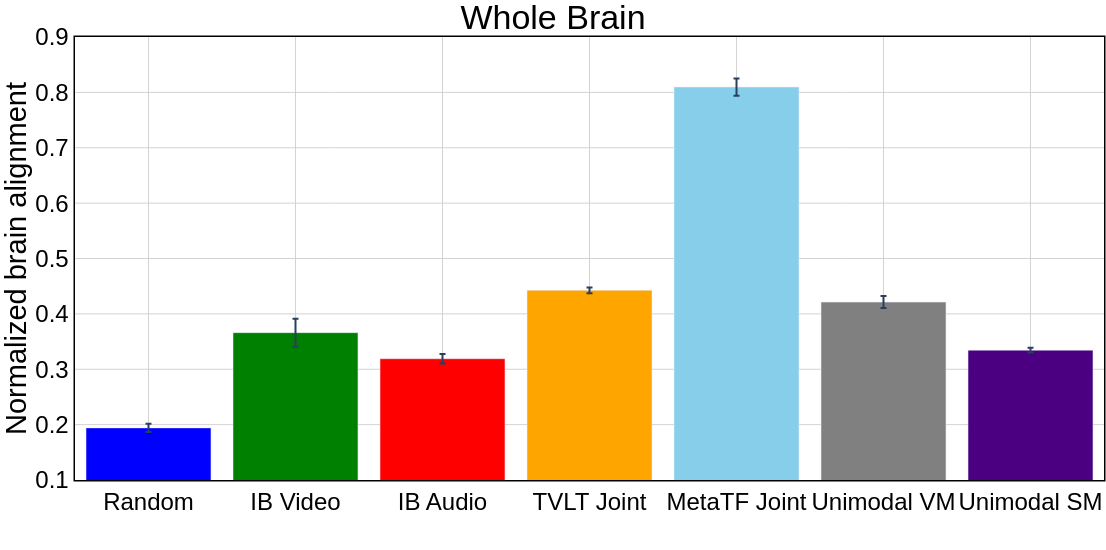

In [38]:
import plotly.graph_objs as go
import plotly
tasks = ['Random','IB Video', 'IB Audio','TVLT Joint','MetaTF Joint', 'Unimodal VM', 'Unimodal SM']

for i in np.arange(1):
    ran = np.mean(normalized_scores[4],axis=0)[0]
    ibv = np.mean(normalized_scores[0],axis=0)[0]
    iba = np.mean(normalized_scores[1],axis=0)[0]
    tvlt =np.mean(np.mean(normalized_scores_vision[3],axis=0))
    meta =np.mean(normalized_scores[6],axis=0)[0]
    vmae =np.mean(np.mean(np.mean(normalized_scores_vision[0:3],axis=0),axis=0),axis=0)
    wav = np.mean(np.mean(np.mean(normalized_scores_speech[0:2],axis=2),axis=0),axis=0)
    

    values = [ran, ibv, iba, tvlt, meta, vmae,  wav]
    stderr = [stats.sem(normalized_scores[4], axis=0, ddof=0)[0],stats.sem(normalized_scores[0], axis=0, ddof=0)[0],stats.sem(normalized_scores[1], axis=0, ddof=0)[0],
              stats.sem(np.mean(normalized_scores_vision, axis=2),axis=1, ddof=0)[3],
              stats.sem(normalized_scores[6], axis=0, ddof=0)[0],
              stats.sem(np.mean(np.mean(normalized_scores_vision[0:3],axis=0),axis=1),axis=0, ddof=0),
              stats.sem(np.mean(np.mean(normalized_scores_speech[0:2],axis=0),axis=1),axis=0, ddof=0)]

    trace1 = go.Bar(
       x = tasks,
       y = values,
       error_y=dict(
                type='data', # value of error bar given in data coordinates
                thickness=2,
                width=3,
                array=stderr,
                visible=True),
      #width=0.1,
        marker=dict(color=['blue','green','red','orange','skyblue','grey','indigo','rgb(231,107,243)', '#8C564B','#ffe4b2','#b2d8b2','cyan','lightblue', 'tan']),
       name = '',
            textposition='outside',textfont_size=30,textfont_color='red'
    )

    data = [trace1]
    layout = go.Layout(barmode = 'group')
    fig = go.Figure(data = data, layout = layout)
    fig.update_layout(bargap=0.15,bargroupgap=0.0, xaxis_title='',
                       yaxis_title='Normalized brain alignment', width=600,height=550, font=dict(
            size=24,
            color='#000000'
        )
    ,title={
            'text': "Whole Brain",
                           'y':0.99,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'}, plot_bgcolor='rgba(0,0,0,0)',showlegend=False, legend=dict(
        yanchor="top",
        y=1.5,
        xanchor="left",
        x=0.01,
        bgcolor='rgba(0,0,0,0)', orientation="h", 
        font=dict(
                size=20,
            )
    ), margin=go.layout.Margin(
            l=0, #left margin
            r=0, #right margin
            b=0, #bottom margin
            t=37  #top margin
        ))
    fig.update_yaxes(range=[0.1, 0.9], tick0=0.1, dtick=0.1, tickmode = 'linear', showline=True, mirror=True, linewidth=1.5, linecolor='black', gridcolor='lightgray')
    #fig.update_yaxes(ticksuffix="%")
    fig.update_xaxes(tick0=0, showline=True, showticklabels=True, mirror=True, linewidth=1.5, linecolor='black', gridcolor='lightgray')

    plotly.io.write_image(fig, 'whole_brain_normalized_alignment_barplot.pdf', format='pdf')
    fig.show()

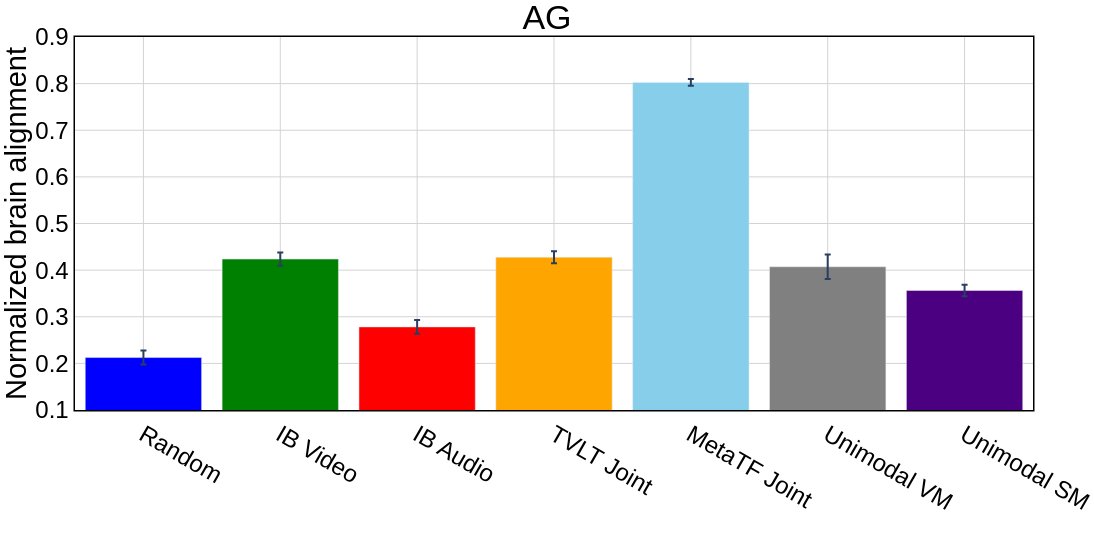

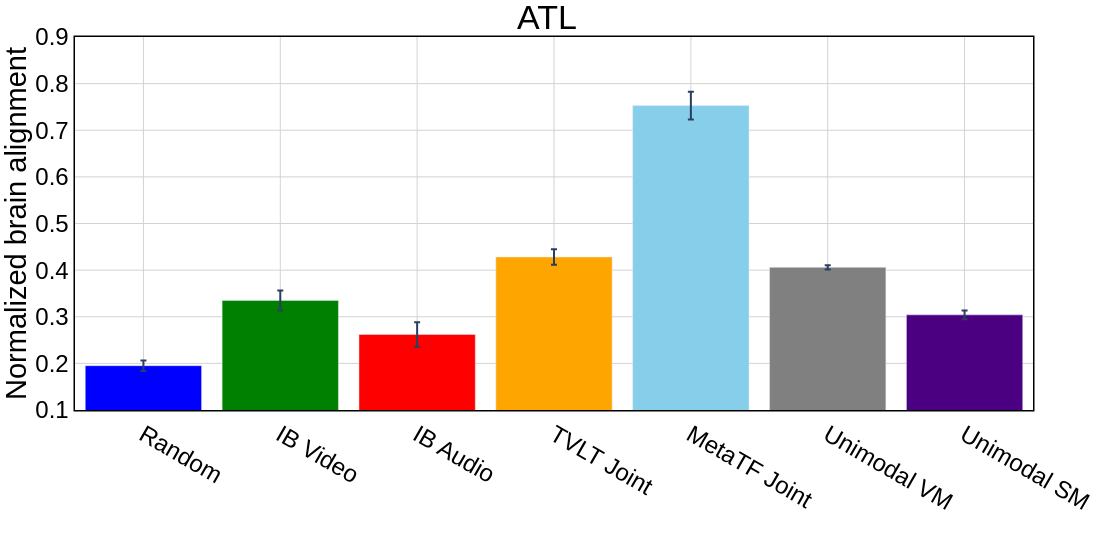

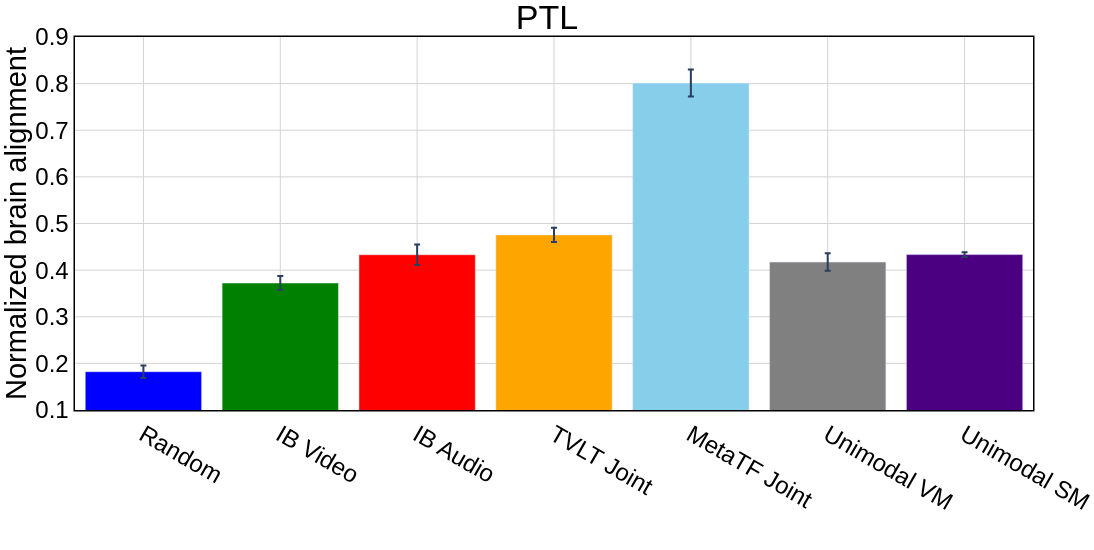

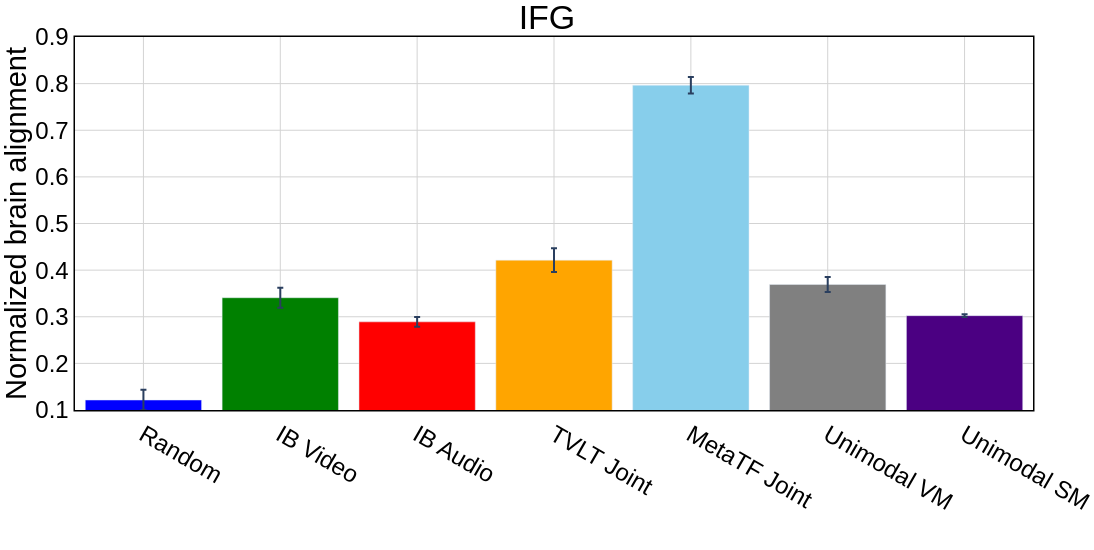

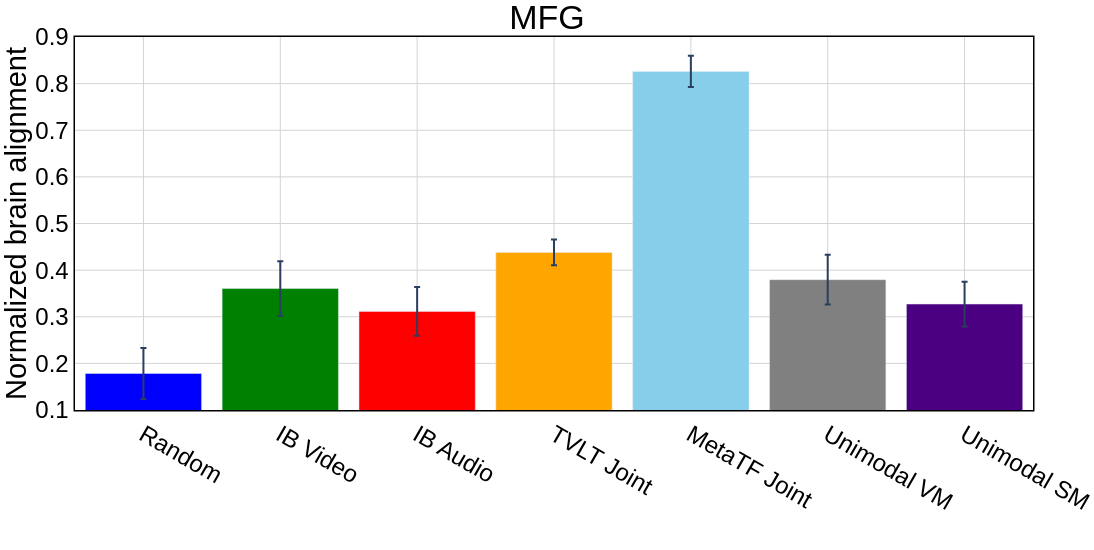

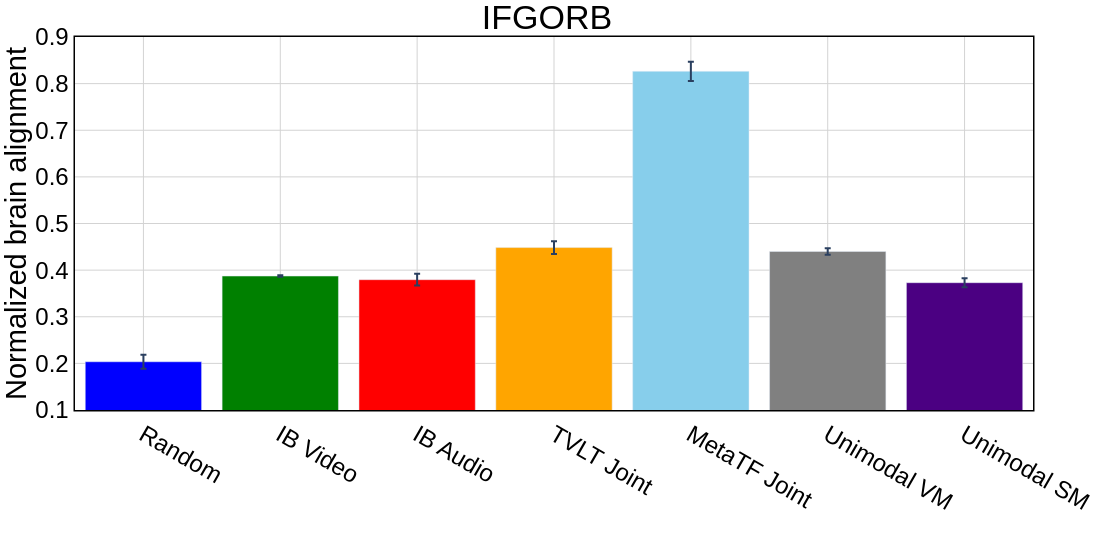

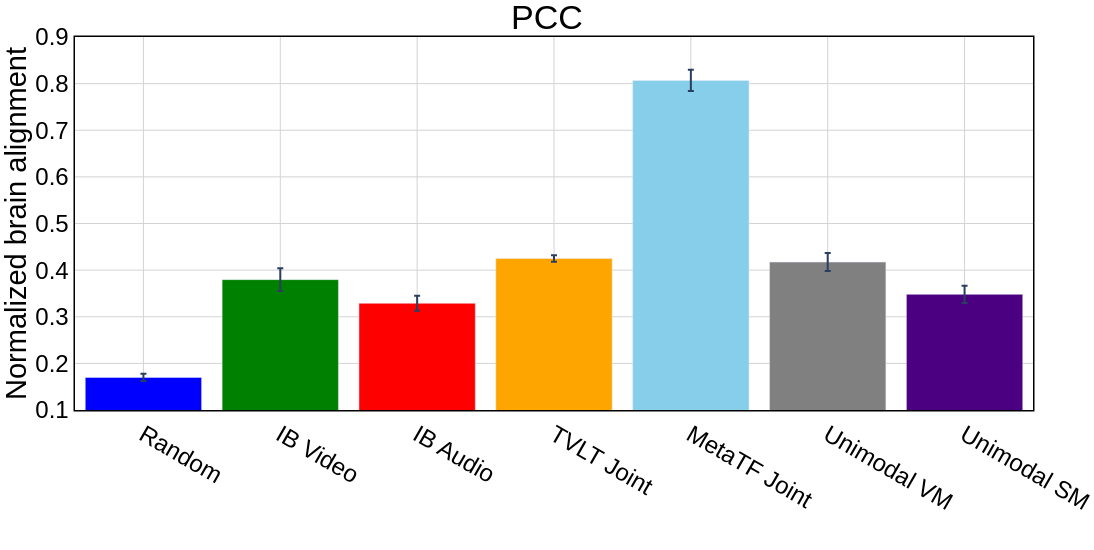

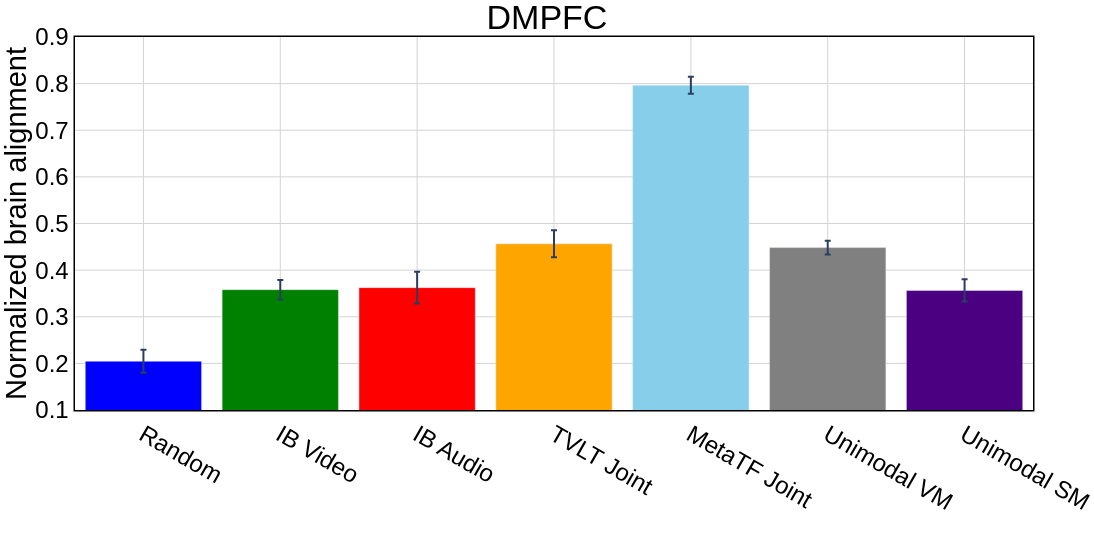

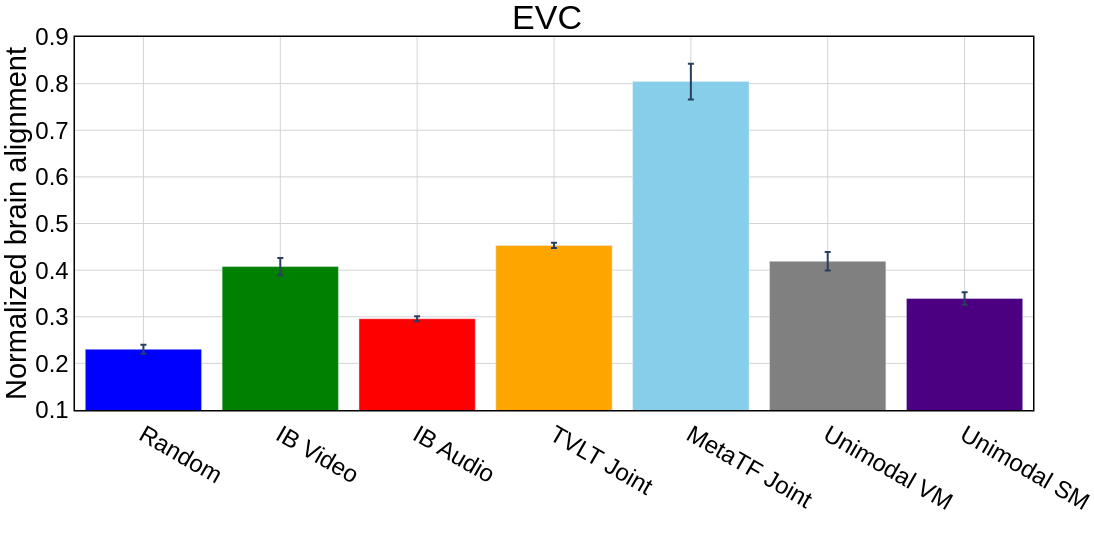

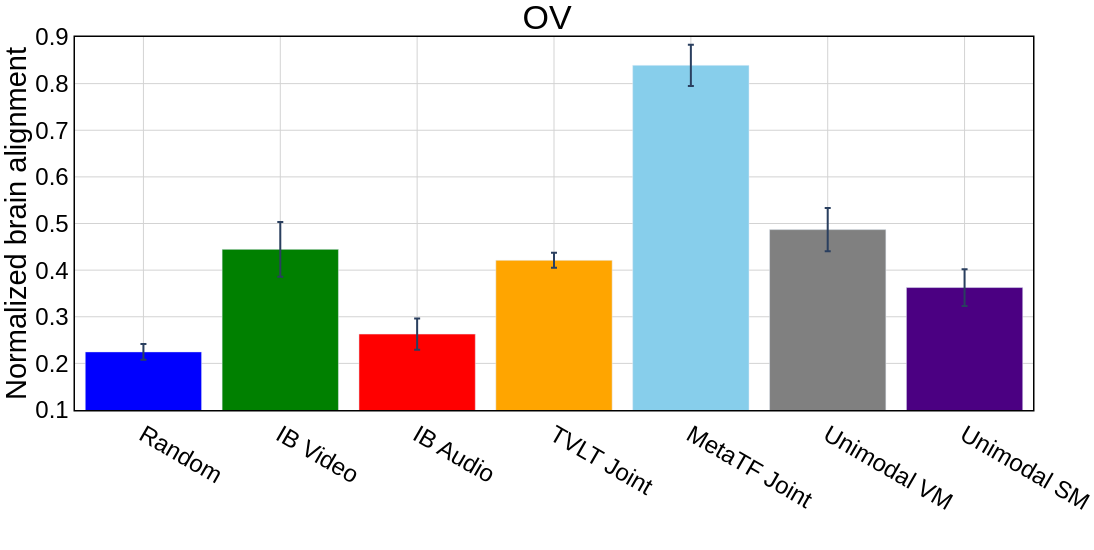

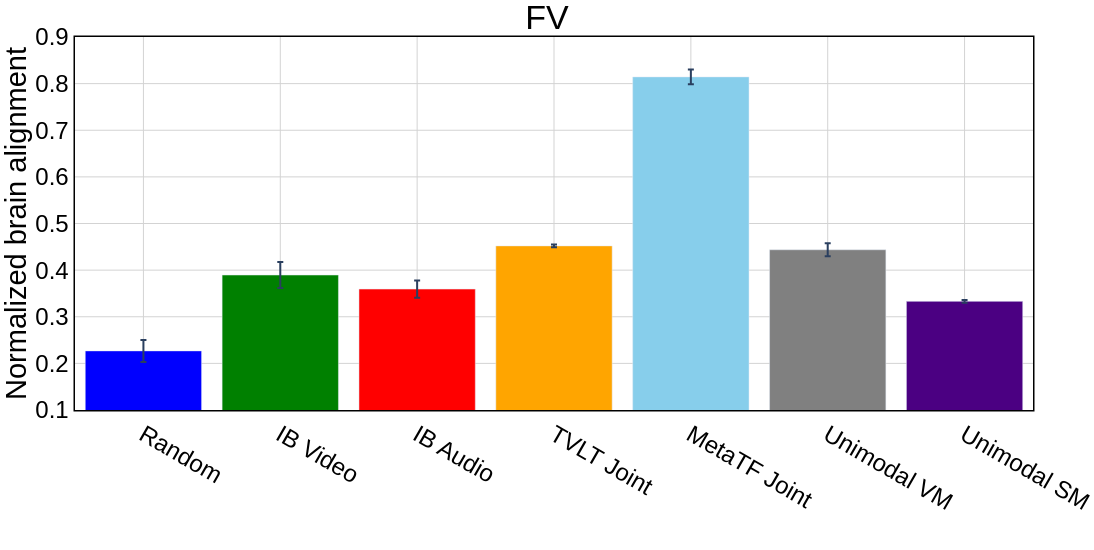

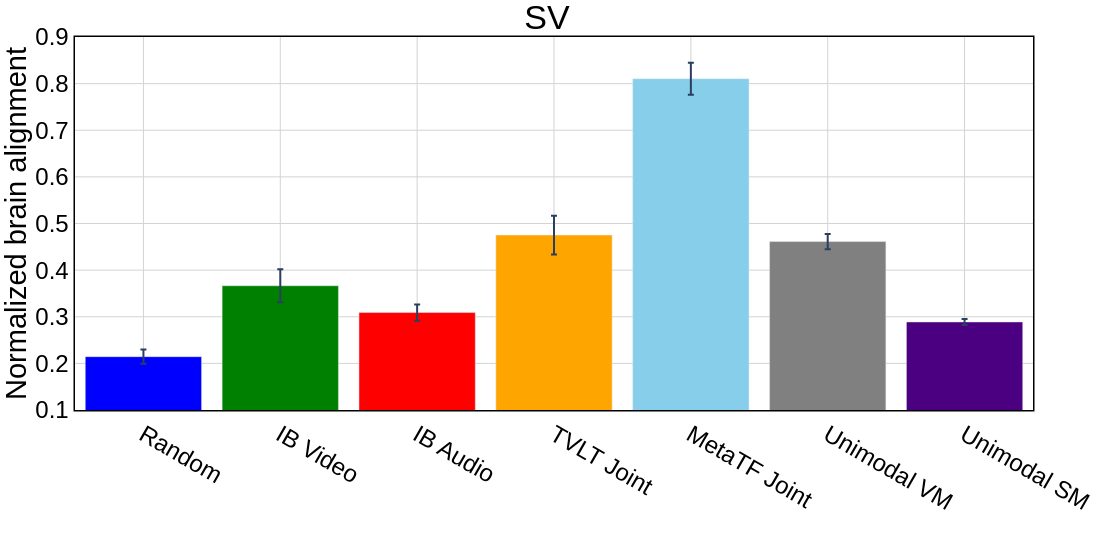

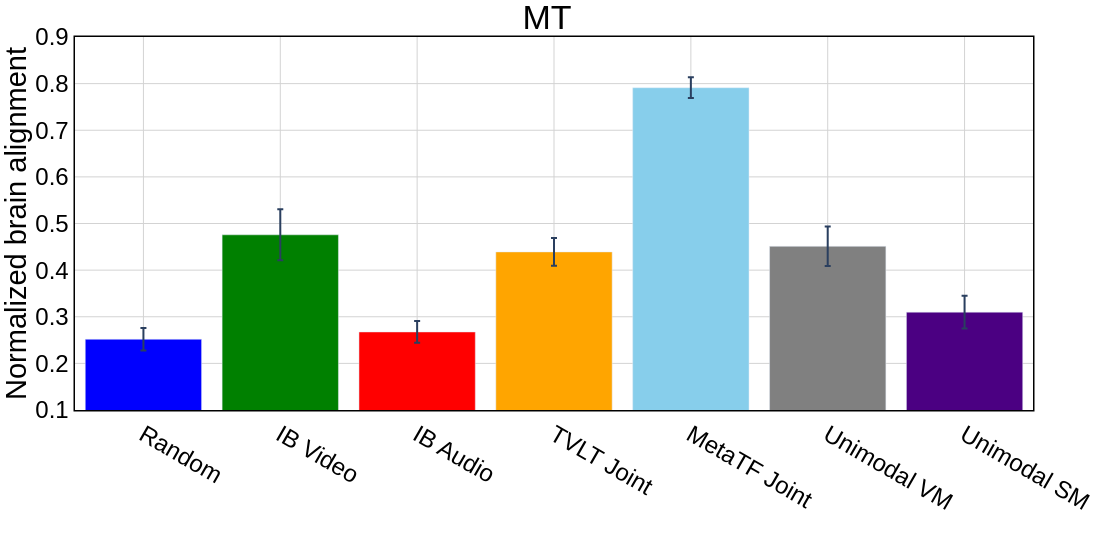

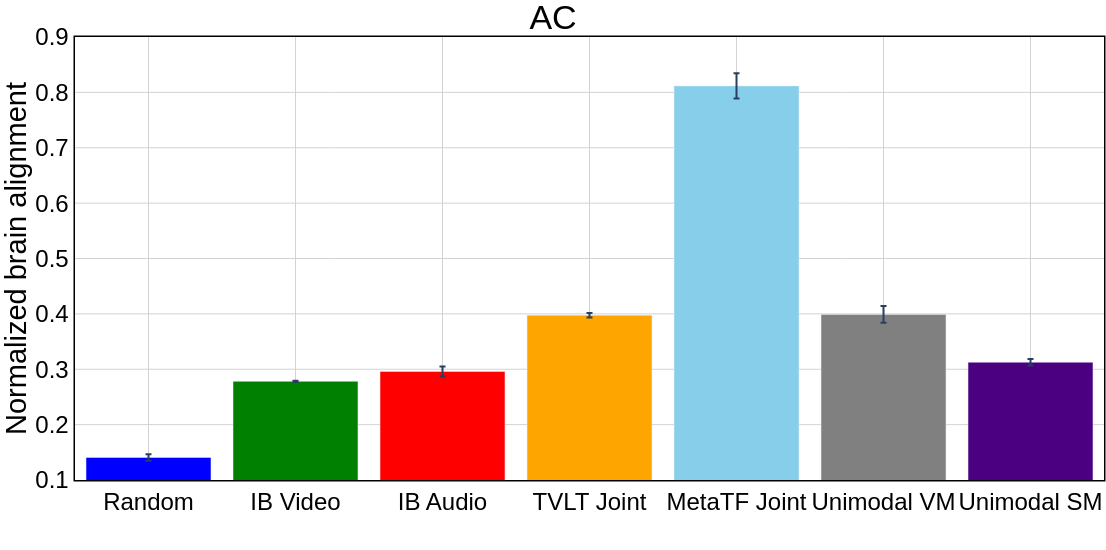

In [36]:
import plotly.graph_objs as go
import plotly
rois = ['AG', 'ATL', 'PTL', 'IFG', 'MFG', 'IFGOrb', 'PCC', 'dmPFC', 'EVC', 'OV', 'FV', 'SV', 'MT', 'AC']
tasks = ['Random','IB Video', 'IB Audio','TVLT Joint','MetaTF Joint', 'Unimodal VM', 'Unimodal SM']
for i in np.arange(14):
    ran = np.mean(normalized_scores_rois[4],axis=0)[i]
    ibv = np.mean(normalized_scores_rois[0],axis=0)[i]
    iba = np.mean(normalized_scores_rois[1],axis=0)[i]
    tvlt = np.mean(np.mean(normalized_scores_vision_rois[3],axis=0),axis=0)[i]
    meta =np.mean(normalized_scores_rois[6],axis=0)[i]
    vmae = np.mean(np.mean(np.mean(normalized_scores_vision_rois[0:3],axis=2),axis=0),axis=0)[i]
    wav = np.mean(np.mean(np.mean(normalized_scores_speech_rois[0:2],axis=2),axis=0),axis=0)[i]
    

    values = [ran, ibv, iba,tvlt,meta, vmae, wav]
    stderr = [stats.sem(normalized_scores_rois[4], axis=0, ddof=0)[i],
              stats.sem(normalized_scores_rois[0], axis=0, ddof=0)[i],stats.sem(normalized_scores_rois[1], axis=0, ddof=0)[i],
              stats.sem(np.mean(normalized_scores_vision_rois, axis=2)[3],axis=0, ddof=0)[i],
              stats.sem(normalized_scores_rois[6], axis=0, ddof=0)[i],
              stats.sem(np.mean(np.mean(normalized_scores_vision_rois[0:3],axis=2),axis=0), axis=0, ddof=0)[i],
             stats.sem(np.mean(np.mean(normalized_scores_speech_rois[0:2],axis=2),axis=0), axis=0, ddof=0)[i]]

    trace1 = go.Bar(
       x = tasks,
       y = values,
       error_y=dict(
                type='data', # value of error bar given in data coordinates
                thickness=2,
                width=3,
                array=stderr,
                visible=True),
      #width=0.1,
        marker=dict(color=['blue','green','red','orange','skyblue','grey','indigo','rgb(231,107,243)', '#8C564B','#ffe4b2','#b2d8b2','cyan','lightblue', 'tan']),
       name = '',
            textposition='outside',textfont_size=30,textfont_color='red'
    )

    data = [trace1]
    layout = go.Layout(barmode = 'group')
    fig = go.Figure(data = data, layout = layout)
    fig.update_layout(bargap=0.15,bargroupgap=0.0, xaxis_title='',
                       yaxis_title='Normalized brain alignment', width=600,height=550, font=dict(
            size=24,
            color='#000000'
        )
    ,title={
            'text': rois[i].upper(),
                           'y':0.99,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'}, plot_bgcolor='rgba(0,0,0,0)',showlegend=False, legend=dict(
        yanchor="top",
        y=1.5,
        xanchor="left",
        x=0.01,
        bgcolor='rgba(0,0,0,0)', orientation="h", 
        font=dict(
                size=20,
            )
    ), margin=go.layout.Margin(
            l=0, #left margin
            r=0, #right margin
            b=0, #bottom margin
            t=37  #top margin
        ))
    fig.update_yaxes(range=[0.1, 0.9], tick0=0.1, dtick=0.1, tickmode = 'linear', showline=True, mirror=True, linewidth=1.5, linecolor='black', gridcolor='lightgray')
    #fig.update_yaxes(ticksuffix="%")
    fig.update_xaxes(tick0=0, showline=True, showticklabels=True, mirror=True, linewidth=1.5, linecolor='black', gridcolor='lightgray')

    plotly.io.write_image(fig, rois[i]+'_brain_normalized_alignment_barplot.pdf', format='pdf')
    fig.show()

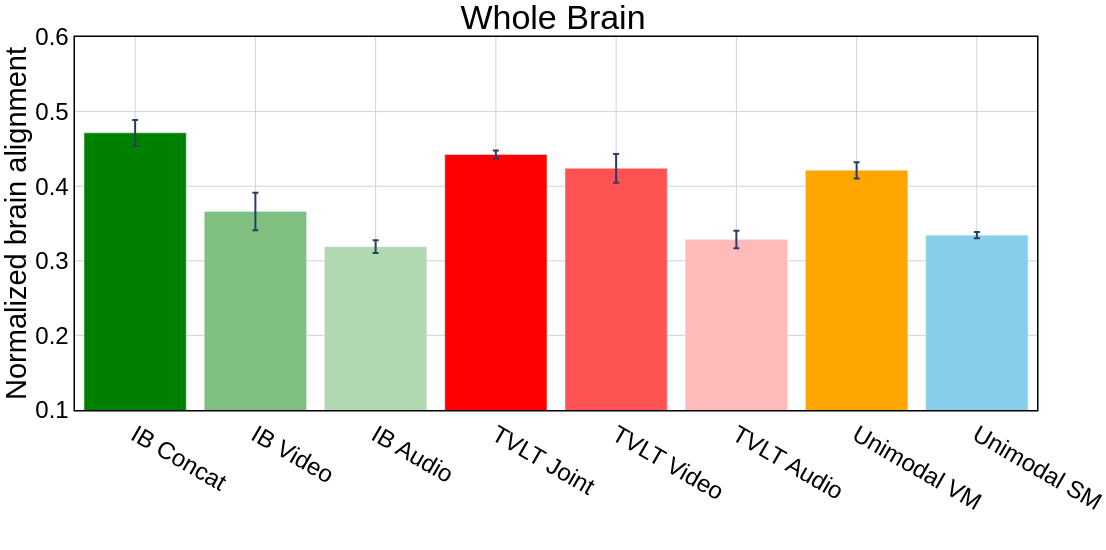

In [27]:
import plotly.graph_objs as go
import plotly
tasks = ['IB Concat','IB Video', 'IB Audio','TVLT Joint','TVLT Video','TVLT Audio','Unimodal VM', 'Unimodal SM']

for i in np.arange(1):
    ibc = np.mean(normalized_scores[5],axis=0)[0]
    ibv = np.mean(normalized_scores[0],axis=0)[0]
    iba = np.mean(normalized_scores[1],axis=0)[0]
    tvlt =np.mean(np.mean(normalized_scores_vision[3],axis=0))
    tvltvideo = np.mean(normalized_scores[2],axis=0)[0]
    tvltaudio = np.mean(normalized_scores[3],axis=0)[0]
    meta =np.mean(normalized_scores[6],axis=0)[0]
    metavideo = np.mean(normalized_scores[7],axis=0)[0]
    metaaudio = np.mean(normalized_scores[8],axis=0)[0]
    vmae =np.mean(np.mean(np.mean(normalized_scores_vision[0:3],axis=0),axis=0),axis=0)
    wav = np.mean(np.mean(np.mean(normalized_scores_speech[0:2],axis=2),axis=0),axis=0)
    

    values = [ibc, ibv, iba, tvlt, tvltvideo, tvltaudio,vmae,wav]
    stderr = [stats.sem(normalized_scores[5], axis=0, ddof=0)[0],stats.sem(normalized_scores[0], axis=0, ddof=0)[0],stats.sem(normalized_scores[1], axis=0, ddof=0)[0],
              stats.sem(np.mean(normalized_scores_vision, axis=2),axis=1, ddof=0)[3],
              stats.sem(normalized_scores[2], axis=0, ddof=0)[0],stats.sem(normalized_scores[3], axis=0, ddof=0)[0],
    stats.sem(np.mean(np.mean(normalized_scores_vision[0:3],axis=0),axis=1),axis=0, ddof=0),
    stats.sem(np.mean(np.mean(normalized_scores_speech[0:2],axis=0),axis=1),axis=0, ddof=0)]
              #stats.sem(normalized_scores[6], axis=0, ddof=0)[0],
              #stats.sem(normalized_scores[7], axis=0, ddof=0)[0],stats.sem(normalized_scores[8], axis=0, ddof=0)[0]]

    trace1 = go.Bar(
       x = tasks,
       y = values,
       error_y=dict(
                type='data', # value of error bar given in data coordinates
                thickness=2,
                width=3,
                array=stderr,
                visible=True),
      #width=0.1,
        marker=dict(color=['green','#7fbf7f','#b2d8b2','red','#ff5252','#ffbaba','orange','skyblue']),
       name = '',
            textposition='outside',textfont_size=30,textfont_color='red'
    )

    data = [trace1]
    layout = go.Layout(barmode = 'group')
    fig = go.Figure(data = data, layout = layout)
    fig.update_layout(bargap=0.15,bargroupgap=0.0, xaxis_title='',
                       yaxis_title='Normalized brain alignment', width=750,height=550, font=dict(
            size=24,
            color='#000000'
        )
    ,title={
            'text': "Whole Brain",
                           'y':0.99,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'}, plot_bgcolor='rgba(0,0,0,0)',showlegend=False, legend=dict(
        yanchor="top",
        y=1.5,
        xanchor="left",
        x=0.01,
        bgcolor='rgba(0,0,0,0)', orientation="h", 
        font=dict(
                size=20,
            )
    ), margin=go.layout.Margin(
            l=0, #left margin
            r=0, #right margin
            b=0, #bottom margin
            t=37  #top margin
        ))
    fig.update_yaxes(range=[0.1, 0.6], tick0=0.1, dtick=0.1, tickmode = 'linear', showline=True, mirror=True, linewidth=1.5, linecolor='black', gridcolor='lightgray')
    #fig.update_yaxes(ticksuffix="%")
    fig.update_xaxes(tick0=0, showline=True, showticklabels=True, mirror=True, linewidth=1.5, linecolor='black', gridcolor='lightgray')

    plotly.io.write_image(fig, 'whole_brain_normalized_alignment_video_audio_barplot.pdf', format='pdf')
    fig.show()

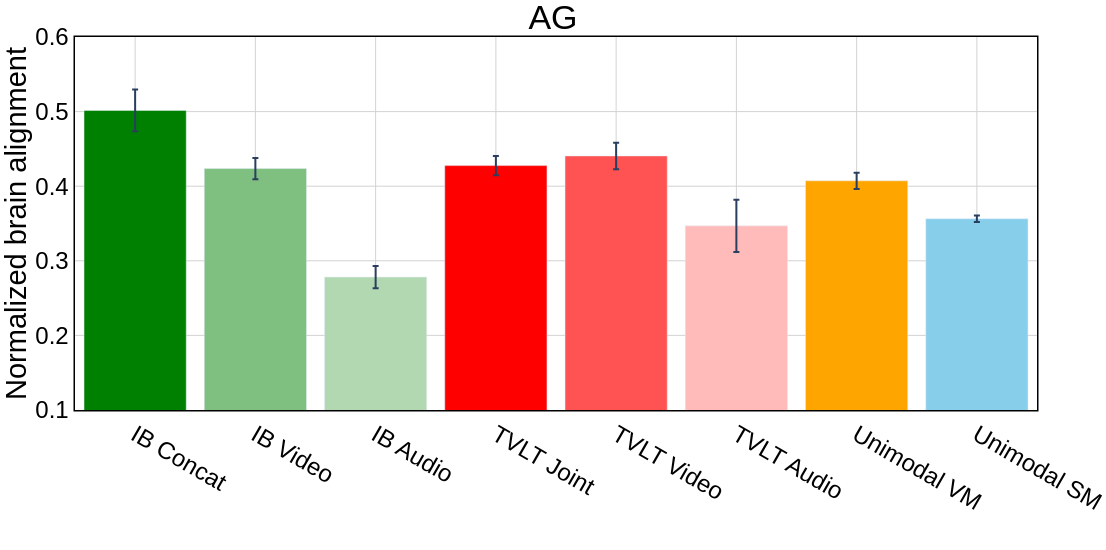

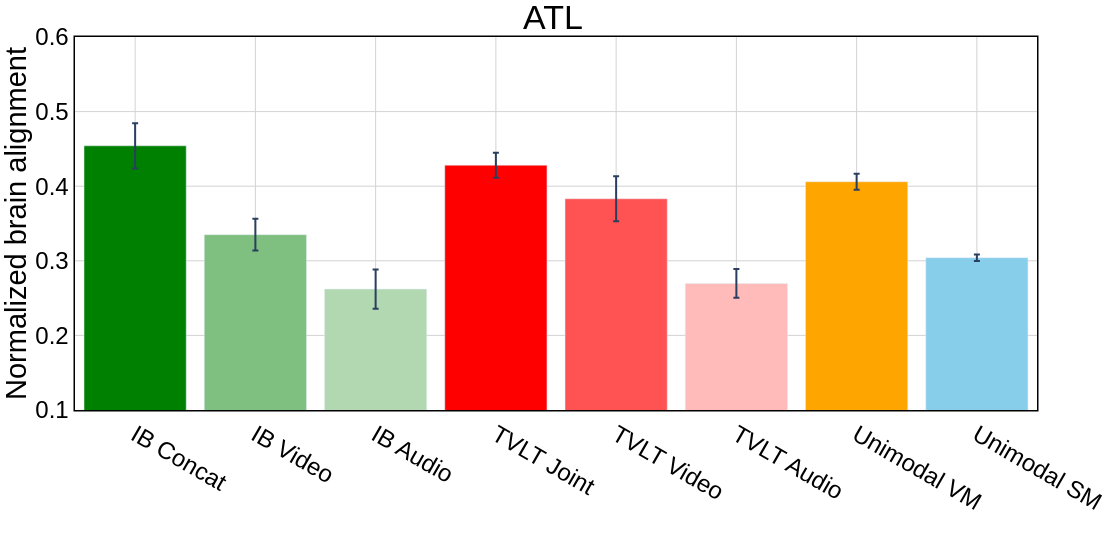

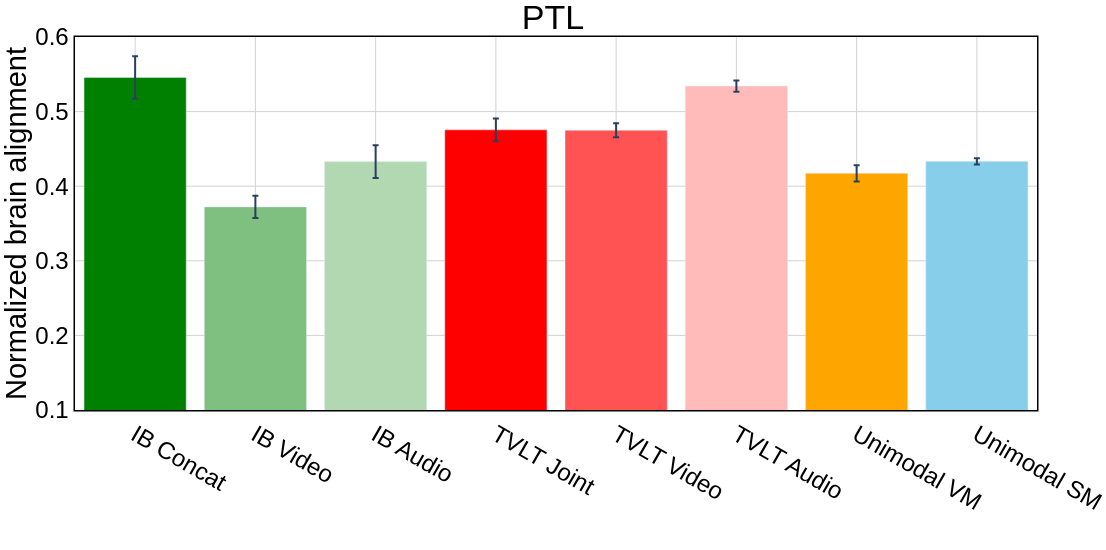

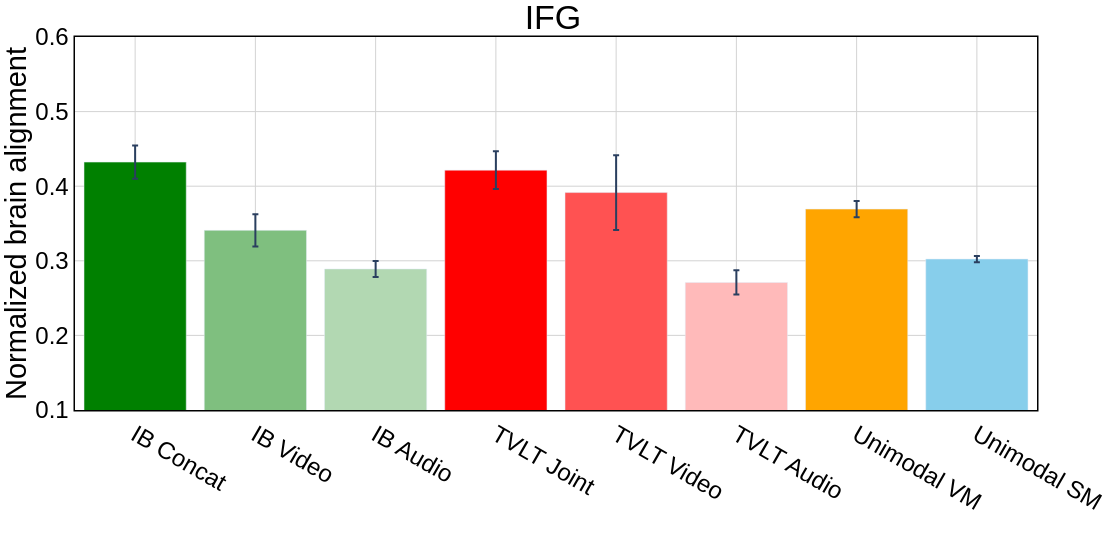

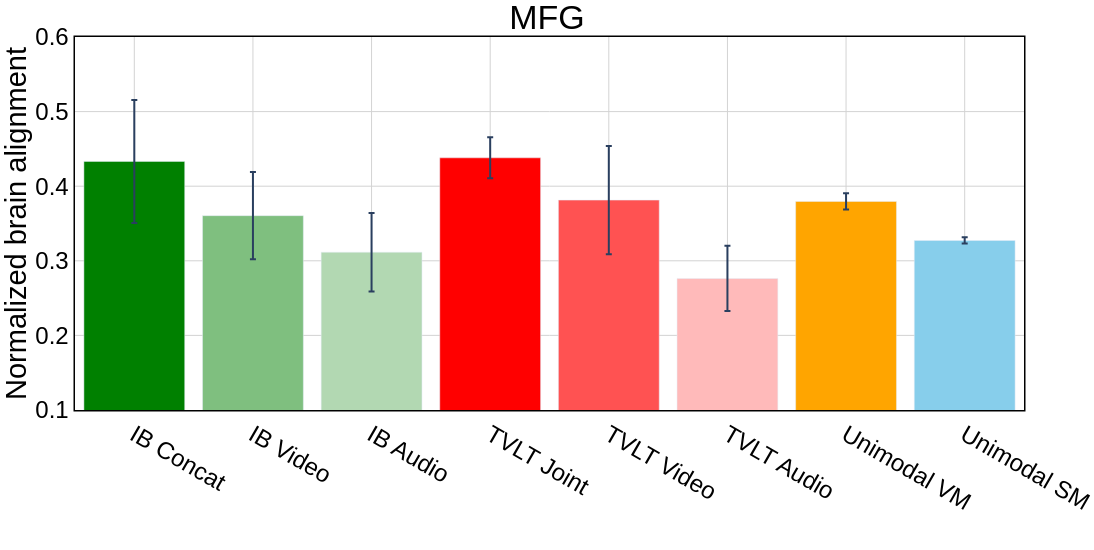

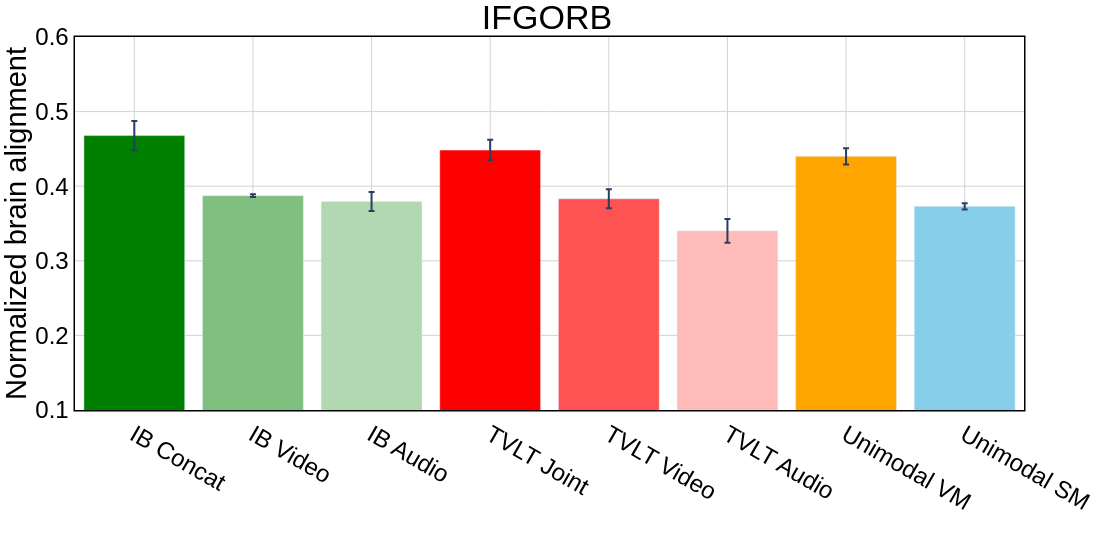

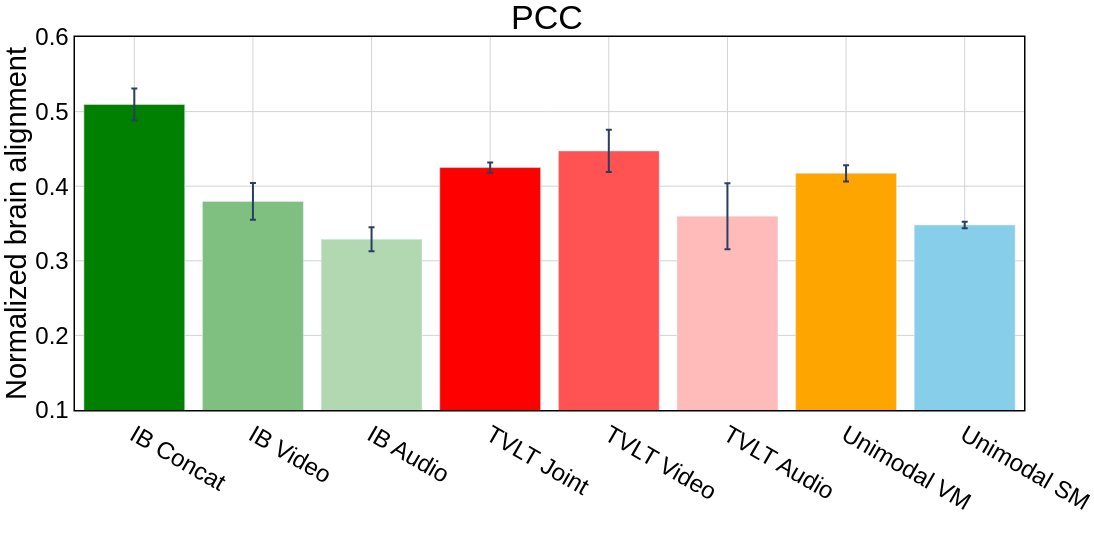

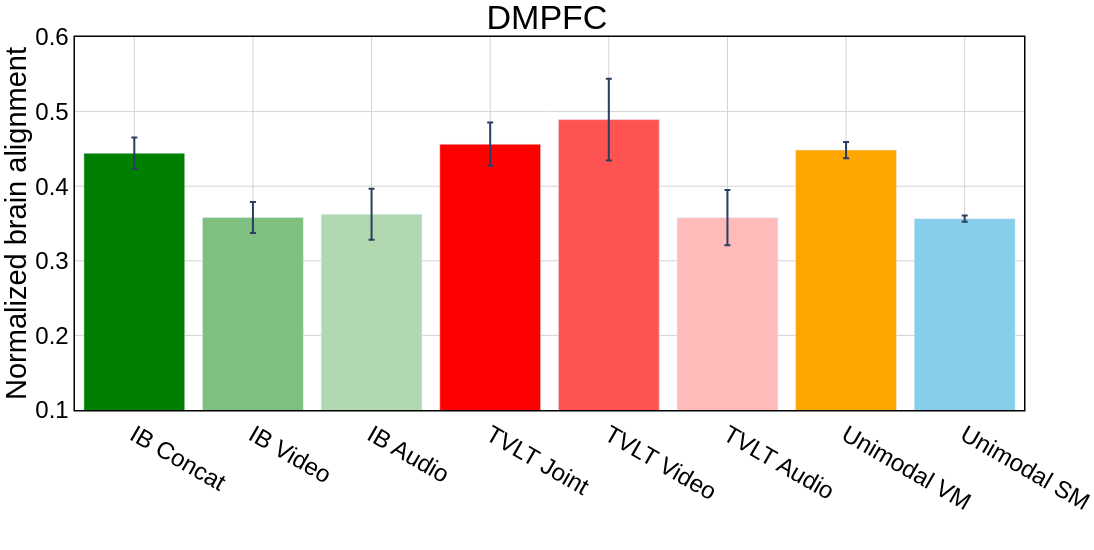

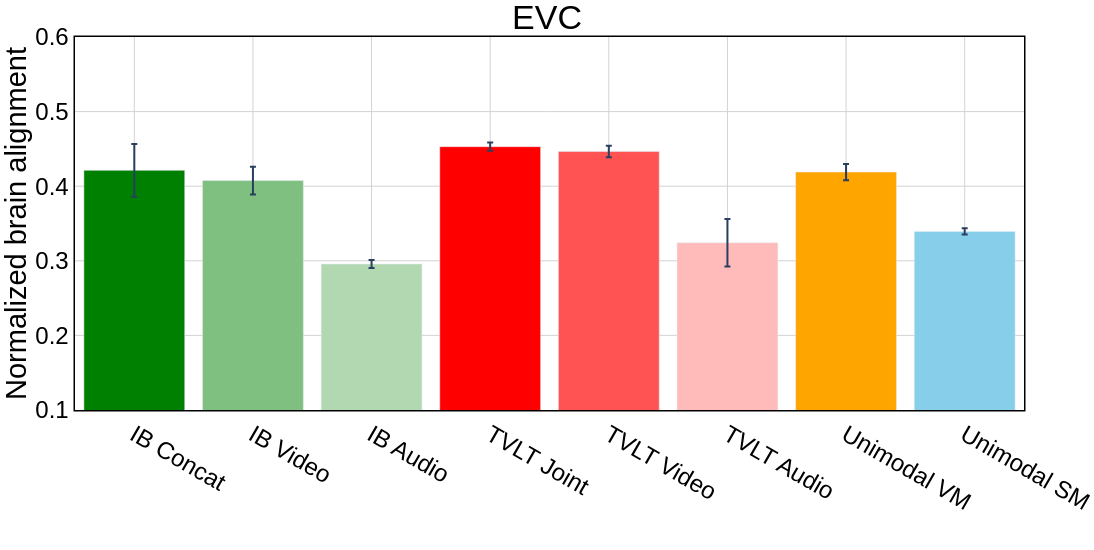

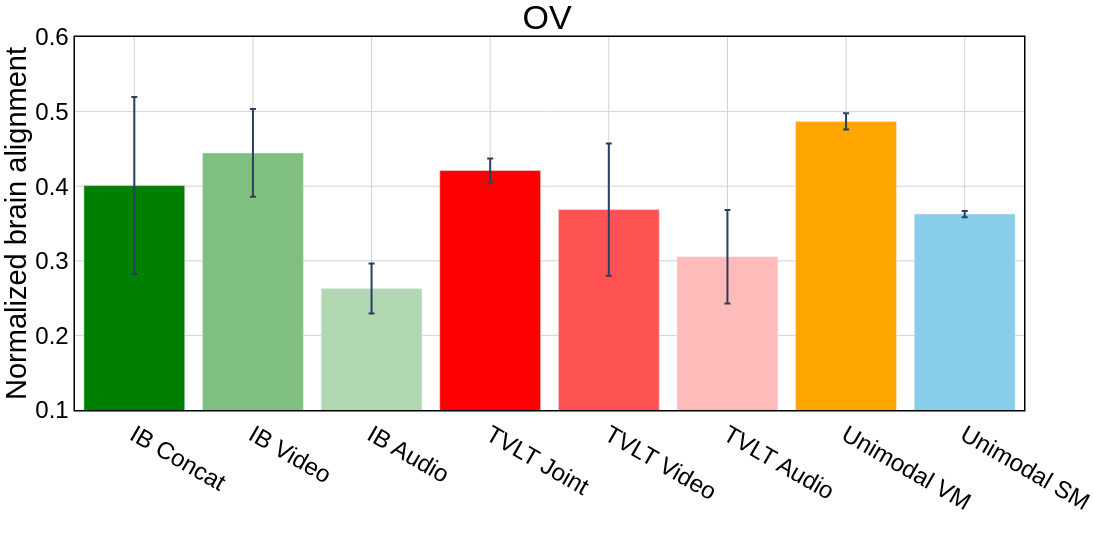

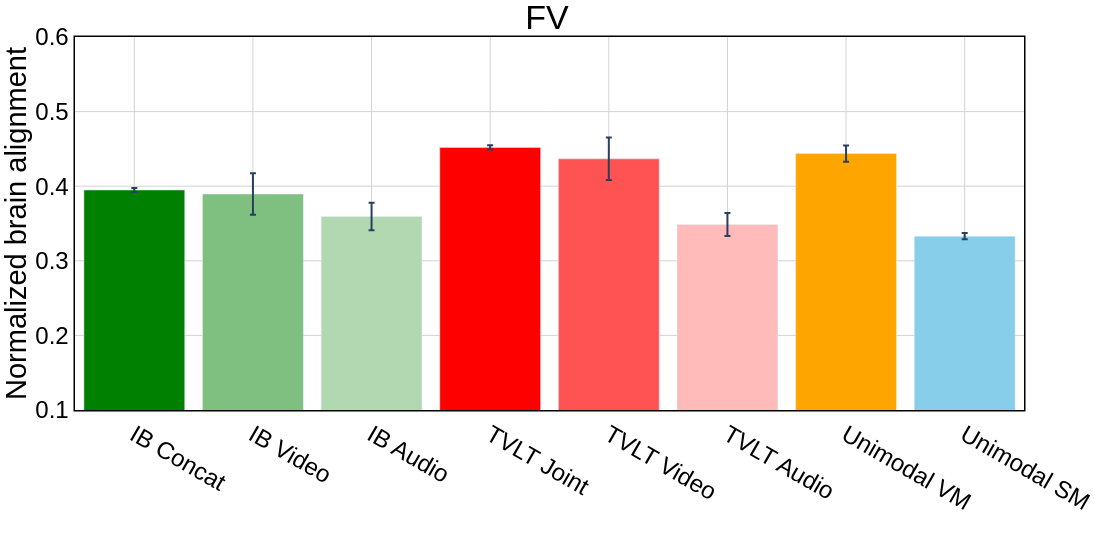

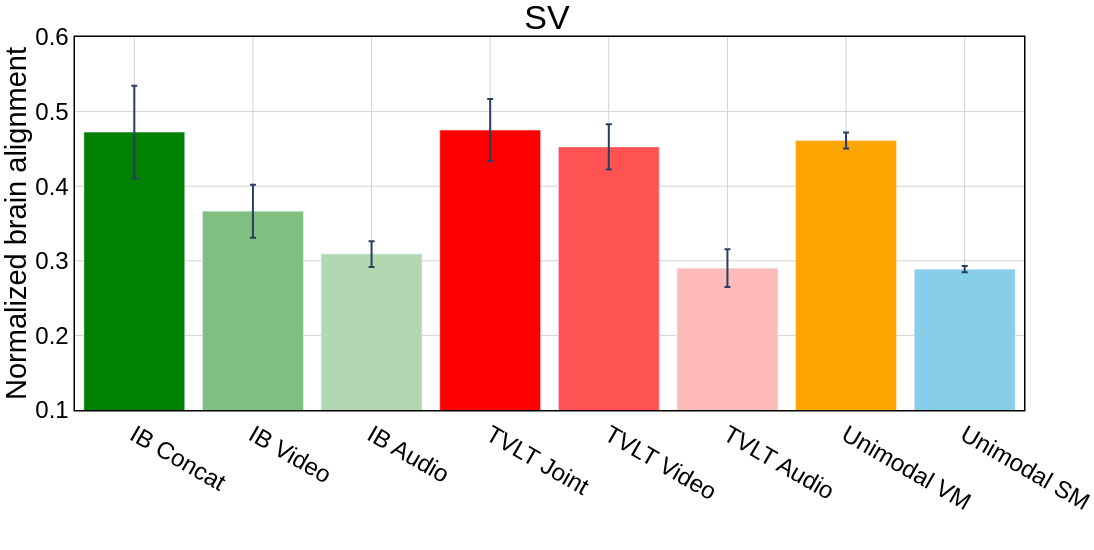

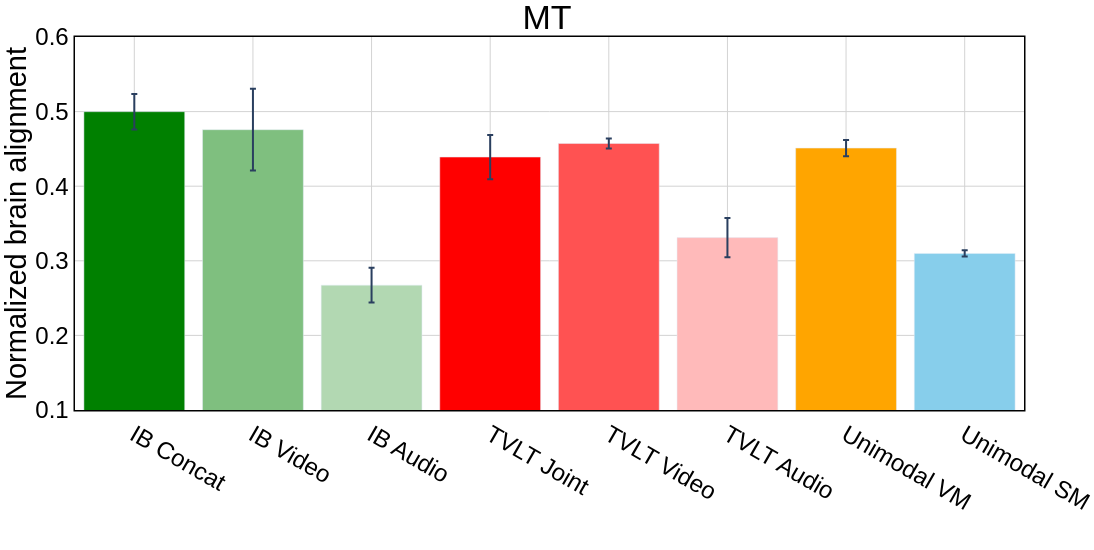

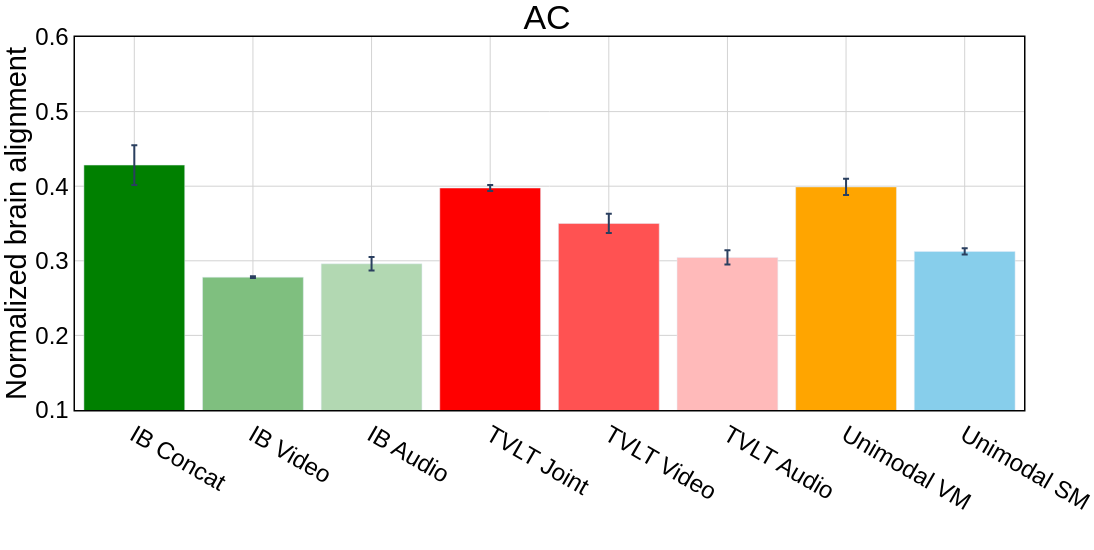

In [21]:
import plotly.graph_objs as go
import plotly
rois = ['AG', 'ATL', 'PTL', 'IFG', 'MFG', 'IFGOrb', 'PCC', 'dmPFC', 'EVC', 'OV', 'FV', 'SV', 'MT', 'AC']
tasks = ['IB Concat','IB Video', 'IB Audio','TVLT Joint','TVLT Video','TVLT Audio','Unimodal VM', 'Unimodal SM']

for i in np.arange(14):
    ibc = np.mean(normalized_scores_rois[5],axis=0)[i]
    ibv = np.mean(normalized_scores_rois[0],axis=0)[i]
    iba = np.mean(normalized_scores_rois[1],axis=0)[i]
    tvlt = np.mean(np.mean(normalized_scores_vision_rois[3],axis=0),axis=0)[i]
    tvltvideo = np.mean(normalized_scores_rois[2],axis=0)[i]
    tvltaudio = np.mean(normalized_scores_rois[3],axis=0)[i]
    meta =np.mean(normalized_scores_rois[6],axis=0)[i]
    metavideo = np.mean(normalized_scores_rois[7],axis=0)[i]
    metaaudio = np.mean(normalized_scores_rois[8],axis=0)[i]
    vmae = np.mean(np.mean(np.mean(normalized_scores_vision_rois[0:3],axis=2),axis=0),axis=0)[i]
    wav = np.mean(np.mean(np.mean(normalized_scores_speech_rois[0:2],axis=2),axis=0),axis=0)[i]

    values = [ibc, ibv, iba,tvlt, tvltvideo,tvltaudio,vmae,wav]
    stderr = [stats.sem(normalized_scores_rois[5], axis=0, ddof=0)[i],
              stats.sem(normalized_scores_rois[0], axis=0, ddof=0)[i],stats.sem(normalized_scores_rois[1], axis=0, ddof=0)[i],
              stats.sem(np.mean(normalized_scores_vision_rois, axis=2)[3],axis=0, ddof=0)[i],
              stats.sem(normalized_scores_rois[2], axis=0, ddof=0)[i],stats.sem(normalized_scores_rois[3], axis=0, ddof=0)[i],
              stats.sem(np.mean(np.mean(normalized_scores_vision[0:3],axis=0),axis=1),axis=0, ddof=0),
              stats.sem(np.mean(np.mean(normalized_scores_speech[0:2],axis=0),axis=1),axis=0, ddof=0)
              #stats.sem(normalized_scores_rois[6], axis=0, ddof=0)[i],
              #stats.sem(normalized_scores_rois[7], axis=0, ddof=0)[i],stats.sem(normalized_scores_rois[8], axis=0, ddof=0)[i],
              ]

    trace1 = go.Bar(
       x = tasks,
       y = values,
       error_y=dict(
                type='data', # value of error bar given in data coordinates
                thickness=2,
                width=3,
                array=stderr,
                visible=True),
      #width=0.1,
        marker=dict(color=['green','#7fbf7f','#b2d8b2','red','#ff5252','#ffbaba','orange','skyblue']),
       name = '',
            textposition='outside',textfont_size=30,textfont_color='red'
    )

    data = [trace1]
    layout = go.Layout(barmode = 'group')
    fig = go.Figure(data = data, layout = layout)
    fig.update_layout(bargap=0.15,bargroupgap=0.0, xaxis_title='',
                       yaxis_title='Normalized brain alignment', width=750,height=550, font=dict(
            size=24,
            color='#000000'
        )
    ,title={
            'text': rois[i].upper(),
                           'y':0.99,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'}, plot_bgcolor='rgba(0,0,0,0)',showlegend=False, legend=dict(
        yanchor="top",
        y=1.5,
        xanchor="left",
        x=0.01,
        bgcolor='rgba(0,0,0,0)', orientation="h", 
        font=dict(
                size=20,
            )
    ), margin=go.layout.Margin(
            l=0, #left margin
            r=0, #right margin
            b=0, #bottom margin
            t=37  #top margin
        ))
    fig.update_yaxes(range=[0.1, 0.6], tick0=0.1, dtick=0.1, tickmode = 'linear', showline=True, mirror=True, linewidth=1.5, linecolor='black', gridcolor='lightgray')
    #fig.update_yaxes(ticksuffix="%")
    fig.update_xaxes(tick0=0, showline=True, showticklabels=True, mirror=True, linewidth=1.5, linecolor='black', gridcolor='lightgray')

    plotly.io.write_image(fig, rois[i]+'_brain_normalized_alignment_video_audio_barplot.pdf', format='pdf')
    fig.show()

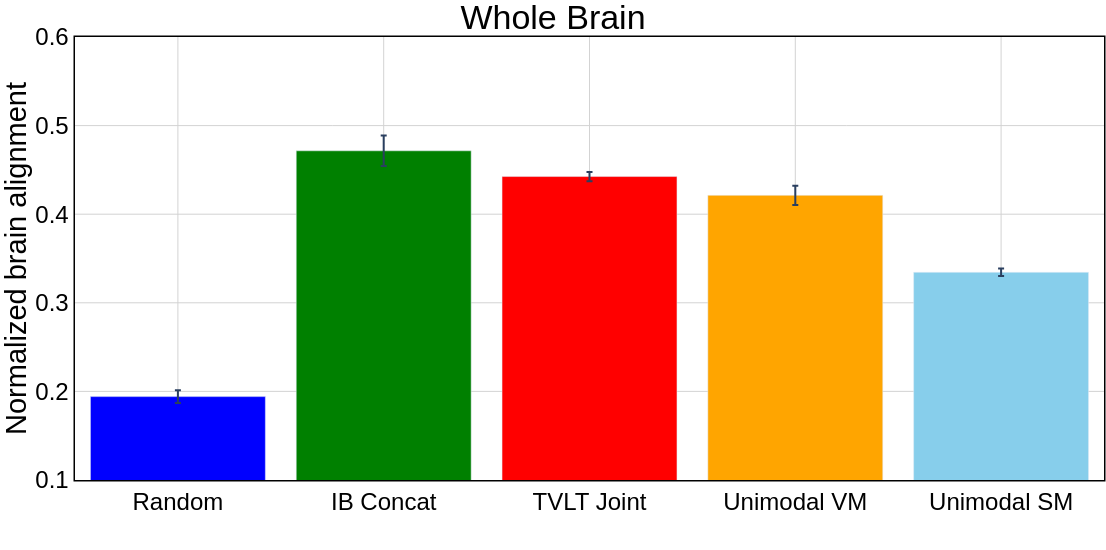

In [28]:
import plotly.graph_objs as go
import plotly
tasks = ['Random','IB Concat','TVLT Joint', 'Unimodal VM', 'Unimodal SM']

for i in np.arange(1):
    ran = np.mean(normalized_scores[4],axis=0)[0]
    ibv = np.mean(normalized_scores[5],axis=0)[0]
    tvlt =np.mean(np.mean(normalized_scores_vision[3],axis=0))
    #meta =np.mean(normalized_scores[6],axis=0)[0]
    vmae =np.mean(np.mean(np.mean(normalized_scores_vision[0:3],axis=0),axis=0),axis=0)
    wav = np.mean(np.mean(np.mean(normalized_scores_speech[0:2],axis=2),axis=0),axis=0)
    

    values = [ran, ibv, tvlt, vmae,  wav]
    stderr = [stats.sem(normalized_scores[4], axis=0, ddof=0)[0],stats.sem(normalized_scores[5], axis=0, ddof=0)[0],
              stats.sem(np.mean(normalized_scores_vision, axis=2),axis=1, ddof=0)[3],
              #stats.sem(normalized_scores[6], axis=0, ddof=0)[0],
              stats.sem(np.mean(np.mean(normalized_scores_vision[0:3],axis=0),axis=1),axis=0, ddof=0),
              stats.sem(np.mean(np.mean(normalized_scores_speech[0:2],axis=0),axis=1),axis=0, ddof=0)]

    trace1 = go.Bar(
       x = tasks,
       y = values,
       error_y=dict(
                type='data', # value of error bar given in data coordinates
                thickness=2,
                width=3,
                array=stderr,
                visible=True),
      #width=0.1,
        marker=dict(color=['blue','green','red','orange','skyblue','grey','indigo','rgb(231,107,243)', '#8C564B','#ffe4b2','#b2d8b2','cyan','lightblue', 'tan']),
       name = '',
            textposition='outside',textfont_size=30,textfont_color='red'
    )

    data = [trace1]
    layout = go.Layout(barmode = 'group')
    fig = go.Figure(data = data, layout = layout)
    fig.update_layout(bargap=0.15,bargroupgap=0.0, xaxis_title='',
                       yaxis_title='Normalized brain alignment', width=600,height=550, font=dict(
            size=24,
            color='#000000'
        )
    ,title={
            'text': "Whole Brain",
                           'y':0.99,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'}, plot_bgcolor='rgba(0,0,0,0)',showlegend=False, legend=dict(
        yanchor="top",
        y=1.5,
        xanchor="left",
        x=0.01,
        bgcolor='rgba(0,0,0,0)', orientation="h", 
        font=dict(
                size=20,
            )
    ), margin=go.layout.Margin(
            l=0, #left margin
            r=0, #right margin
            b=0, #bottom margin
            t=37  #top margin
        ))
    fig.update_yaxes(range=[0.1, 0.6], tick0=0.1, dtick=0.1, tickmode = 'linear', showline=True, mirror=True, linewidth=1.5, linecolor='black', gridcolor='lightgray')
    #fig.update_yaxes(ticksuffix="%")
    fig.update_xaxes(tick0=0, showline=True, showticklabels=True, mirror=True, linewidth=1.5, linecolor='black', gridcolor='lightgray')

    plotly.io.write_image(fig, 'whole_brain_normalized_alignment_barplot.pdf', format='pdf')
    fig.show()

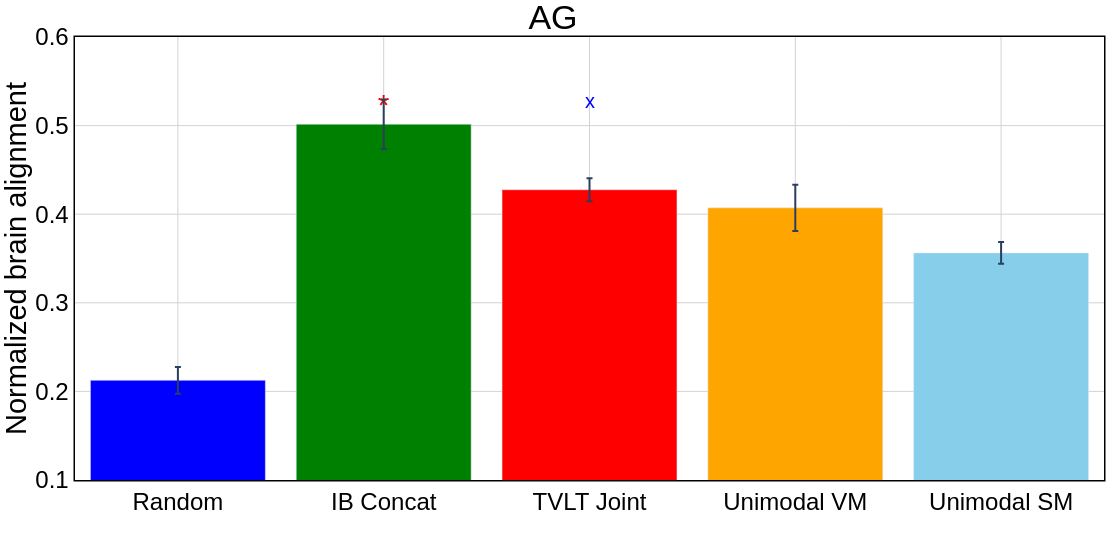

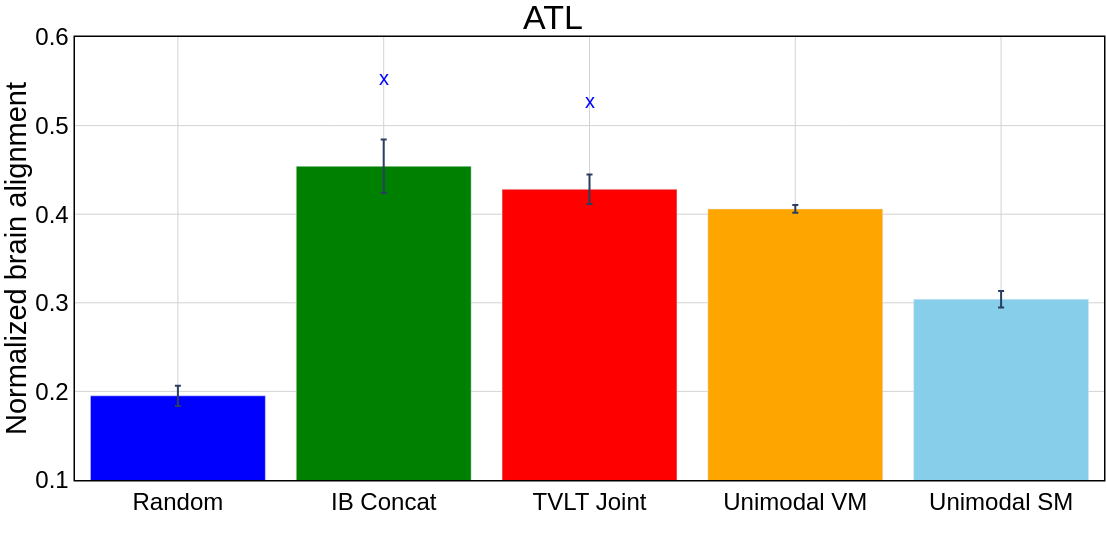

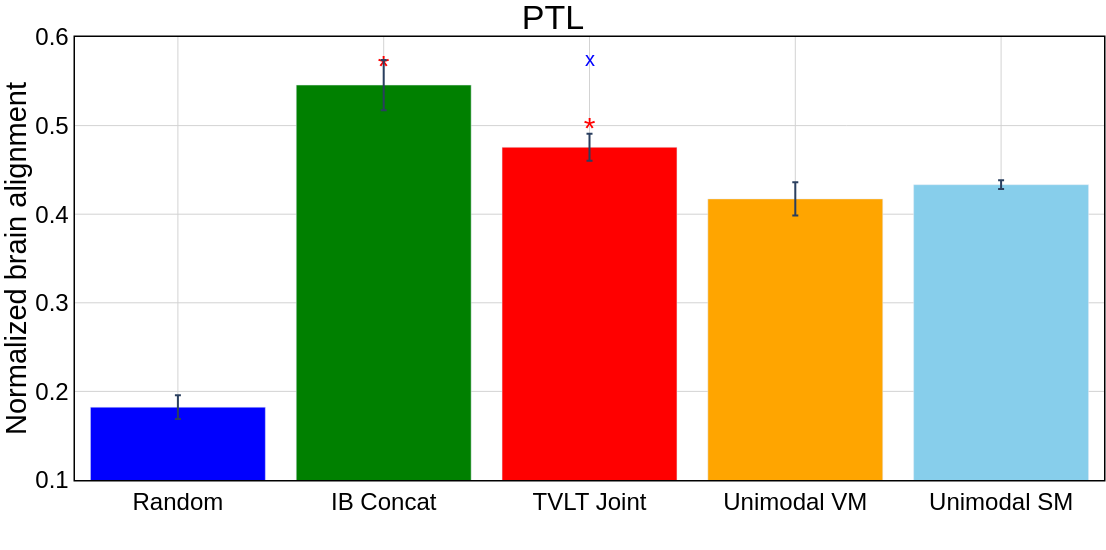

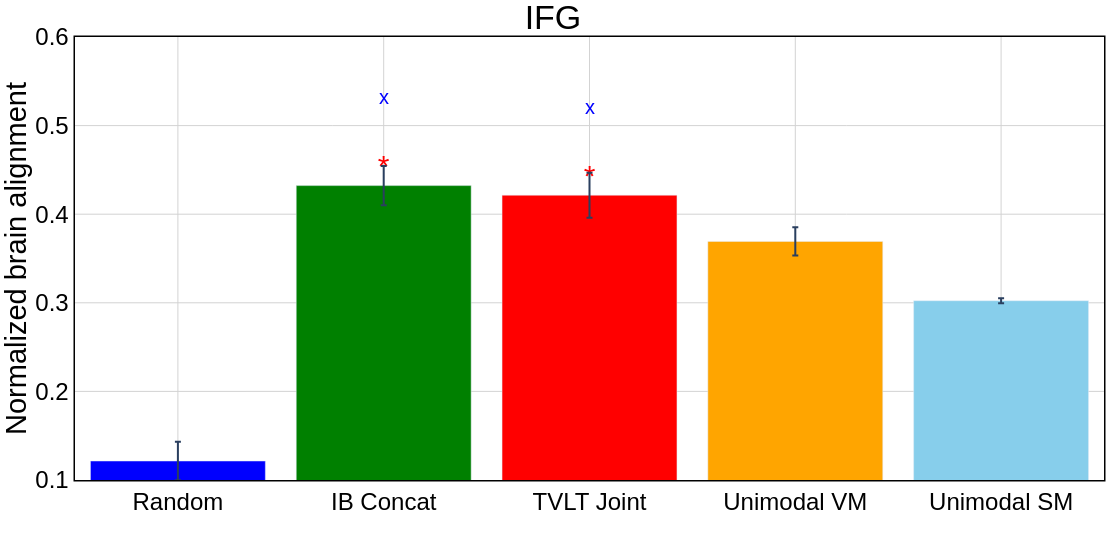

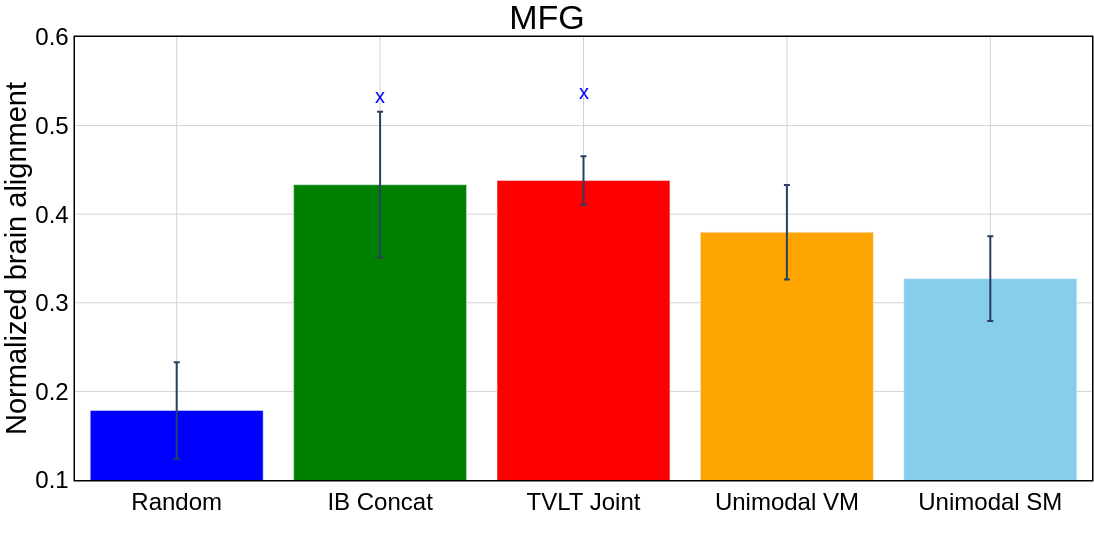

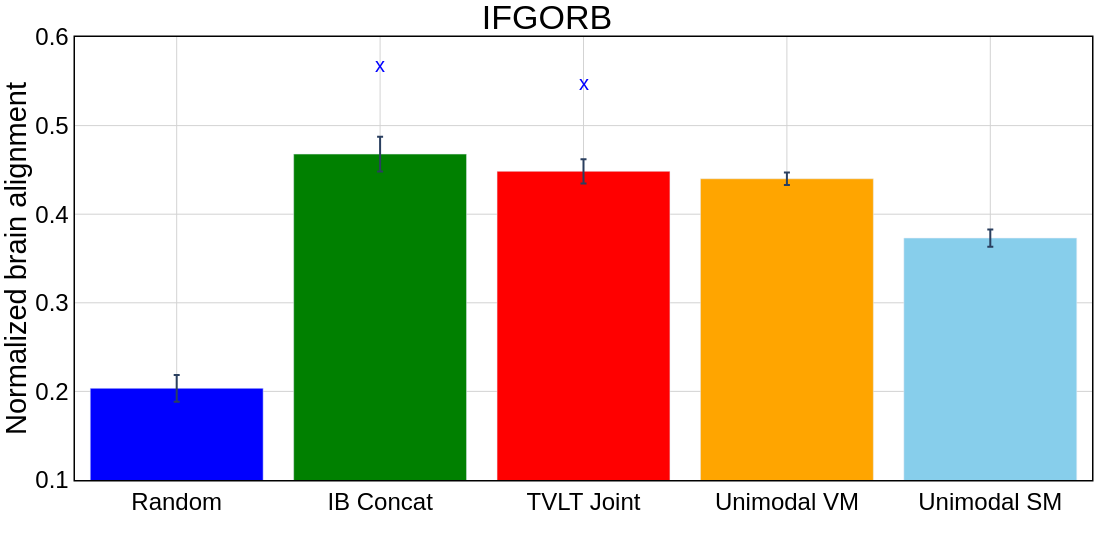

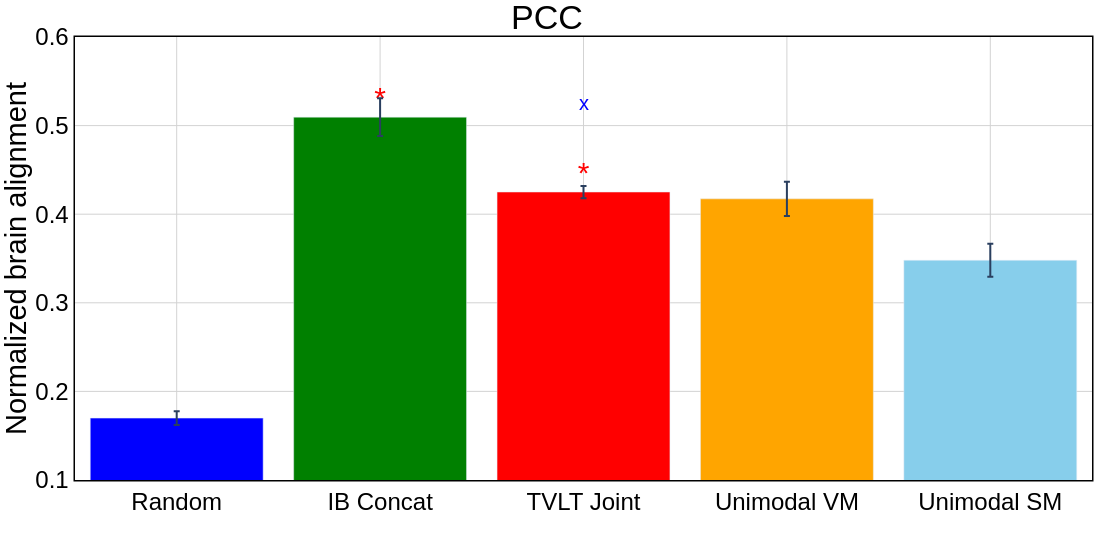

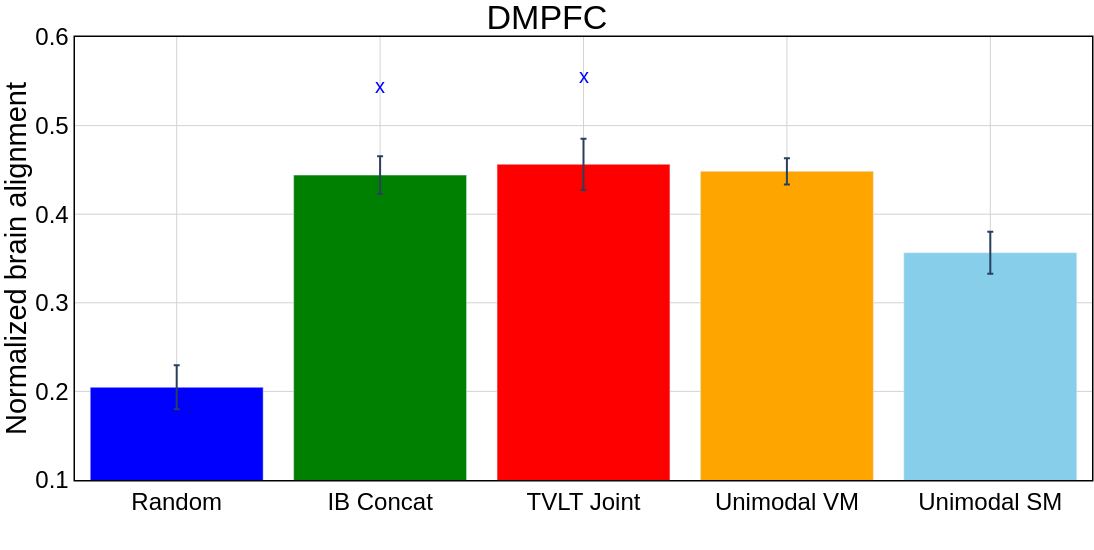

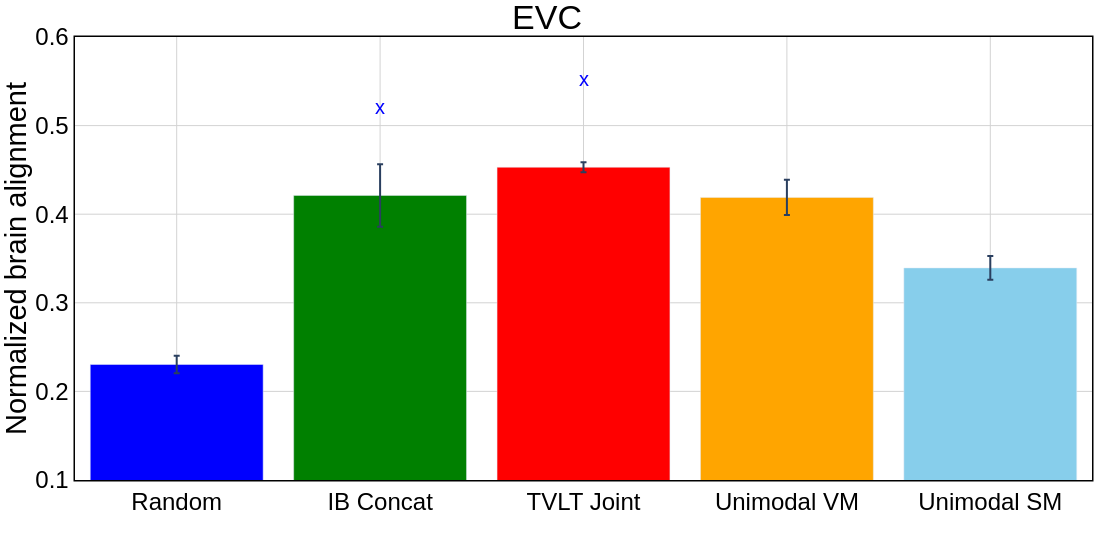

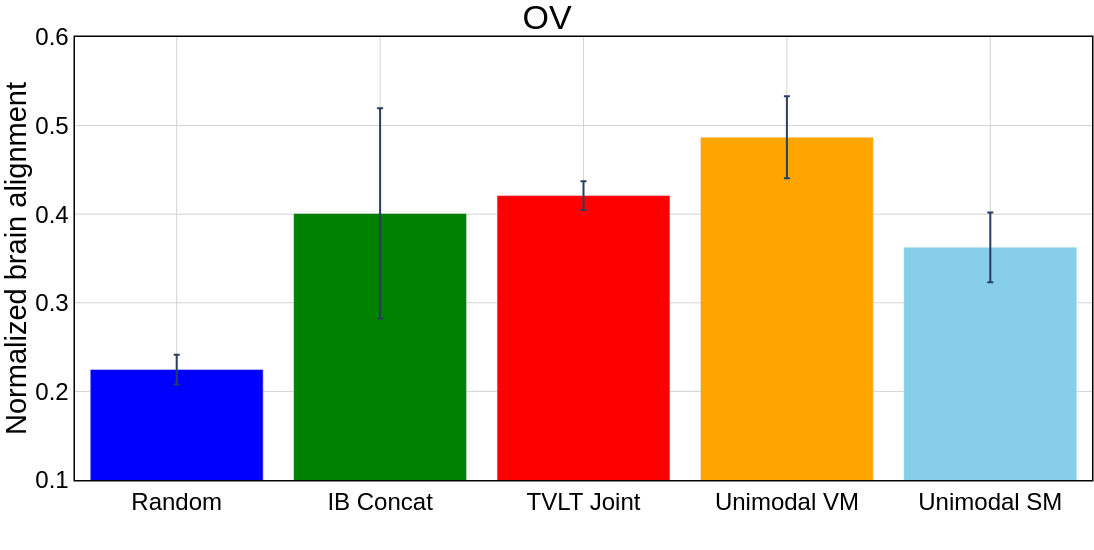

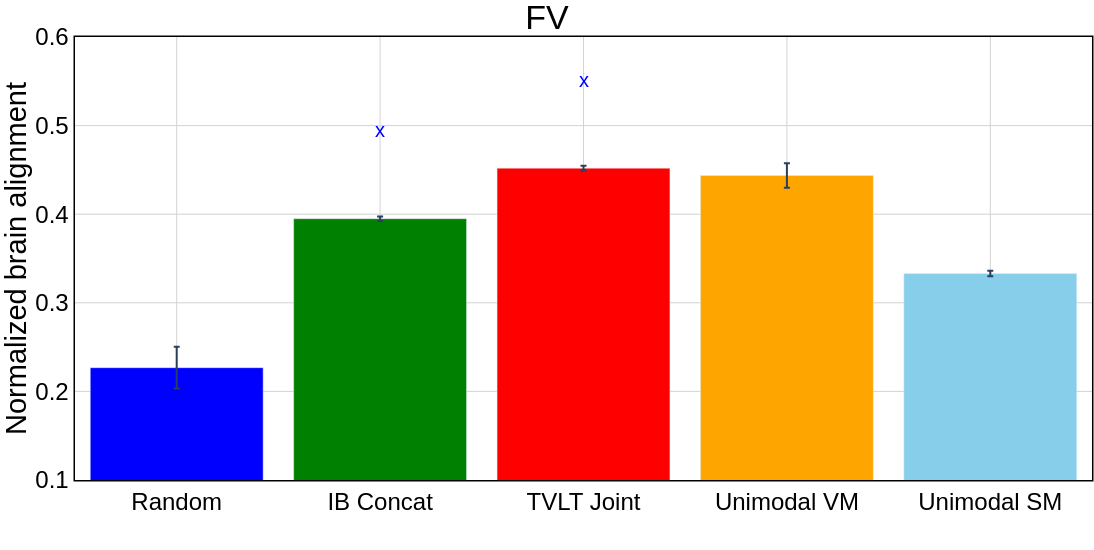

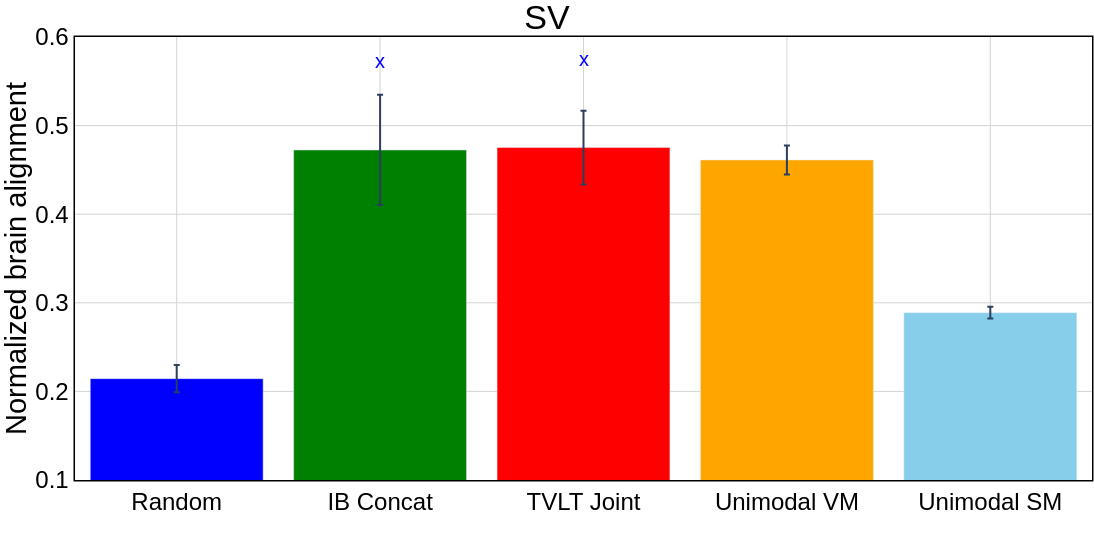

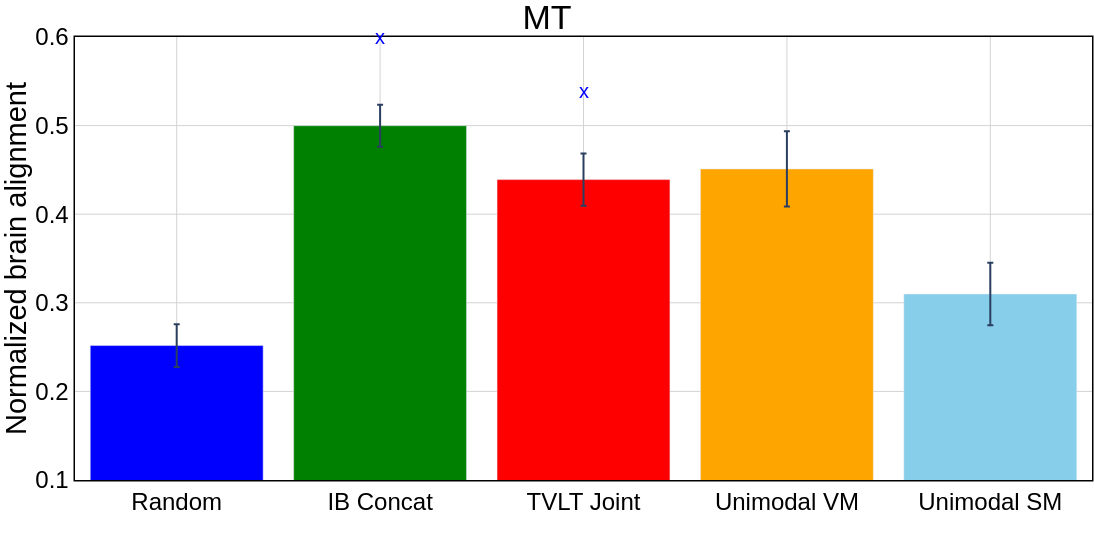

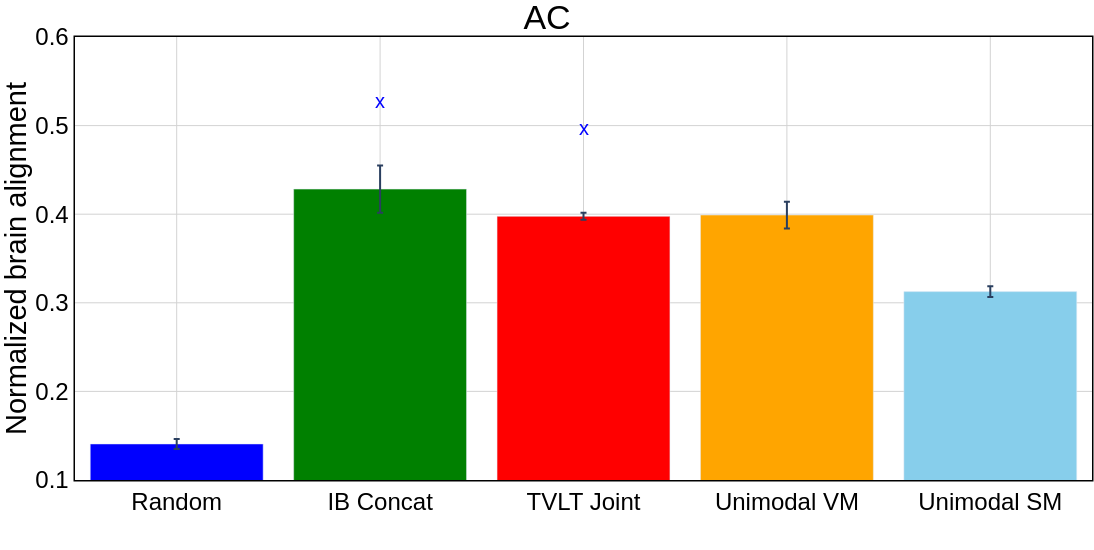

In [29]:
import plotly.graph_objs as go
import plotly
rois = ['AG', 'ATL', 'PTL', 'IFG', 'MFG', 'IFGOrb', 'PCC', 'dmPFC', 'EVC', 'OV', 'FV', 'SV', 'MT', 'AC']
tasks = ['Random','IB Concat','TVLT Joint', 'Unimodal VM', 'Unimodal SM']
for i in np.arange(14):
    ran = np.mean(normalized_scores_rois[4],axis=0)[i]
    ibv = np.mean(normalized_scores_rois[5],axis=0)[i]
    tvlt = np.mean(np.mean(normalized_scores_vision_rois[3],axis=0),axis=0)[i]
    #meta =np.mean(normalized_scores_rois[6],axis=0)[i]
    vmae = np.mean(np.mean(np.mean(normalized_scores_vision_rois[0:3],axis=2),axis=0),axis=0)[i]
    wav = np.mean(np.mean(np.mean(normalized_scores_speech_rois[0:2],axis=2),axis=0),axis=0)[i]
    

    values = [ran, ibv, tvlt, vmae, wav]
    stderr = [stats.sem(normalized_scores_rois[4], axis=0, ddof=0)[i],
              stats.sem(normalized_scores_rois[5], axis=0, ddof=0)[i],
              stats.sem(np.mean(normalized_scores_vision_rois, axis=2)[3],axis=0, ddof=0)[i],
              #stats.sem(normalized_scores_rois[6], axis=0, ddof=0)[i],
              stats.sem(np.mean(np.mean(normalized_scores_vision_rois[0:3],axis=2),axis=0), axis=0, ddof=0)[i],
             stats.sem(np.mean(np.mean(normalized_scores_speech_rois[0:2],axis=2),axis=0), axis=0, ddof=0)[i]]

    if 'AG' in rois[i]:
        text=['','*','','','']
    elif 'PTL' in rois[i]:
        text=['','*','*','','']
    elif 'IFG' in rois[i] and 'IFGOrb' not in rois[i]:
        text=['','*','*','','']
    elif 'PCC' in rois[i]:
        text=['','*','*','','']
    else:
        text=['','','','','']
    trace1 = go.Bar(
       x = tasks,
       y = values,
       error_y=dict(
                type='data', # value of error bar given in data coordinates
                thickness=2,
                width=3,
                array=stderr,
                visible=True),
      #width=0.1,
        marker=dict(color=['blue','green','red','orange','skyblue','grey','indigo','rgb(231,107,243)', '#8C564B','#ffe4b2','#b2d8b2','cyan','lightblue', 'tan']),
         text=text,textposition='outside',textfont_size=30,textfont_color='red'
    )

    data = [trace1]
    layout = go.Layout(barmode = 'group')
    fig = go.Figure(data = data, layout = layout)

    # Add additional annotations
    if 'OV' in rois[i]:
        for idx, task in enumerate(tasks[1:2]):
            fig.add_annotation(
                x=task,
                y=values[idx+1]+0.1,  # Position the text at half the bar's height
                text='',  # Text to display
                showarrow=False,
                font=dict(size=20, color='blue')
            )
    else:
        for idx, task in enumerate(tasks[1:3]):
            fig.add_annotation(
                x=task,
                y=values[idx+1]+0.1,  # Position the text at half the bar's height
                text='x',  # Text to display
                showarrow=False,
                font=dict(size=20, color='blue')
            )
    # # Add additional annotations
    # for idx, task in enumerate(tasks[2:3]):
    #     fig.add_annotation(
    #         x=task,
    #         y=values[idx+3]+0.08,  # Position the text at half the bar's height
    #         text='x',  # Text to display
    #         showarrow=False,
    #         font=dict(size=20, color='blue')
    #     )
    
    fig.update_layout(bargap=0.15,bargroupgap=0.0, xaxis_title='',
                       yaxis_title='Normalized brain alignment', width=600,height=550, font=dict(
            size=24,
            color='#000000'
        )
    ,title={
            'text': rois[i].upper(),
                           'y':0.99,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'}, plot_bgcolor='rgba(0,0,0,0)',showlegend=False, legend=dict(
        yanchor="top",
        y=1.5,
        xanchor="left",
        x=0.01,
        bgcolor='rgba(0,0,0,0)', orientation="h", 
        font=dict(
                size=20,
            )
    ), margin=go.layout.Margin(
            l=0, #left margin
            r=0, #right margin
            b=0, #bottom margin
            t=37  #top margin
        ))
    fig.update_yaxes(range=[0.1, 0.6], tick0=0.1, dtick=0.1, tickmode = 'linear', showline=True, mirror=True, linewidth=1.5, linecolor='black', gridcolor='lightgray')
    #fig.update_yaxes(ticksuffix="%")
    fig.update_xaxes(tick0=0, showline=True, showticklabels=True, mirror=True, linewidth=1.5, linecolor='black', gridcolor='lightgray')

    plotly.io.write_image(fig, rois[i]+'_brain_normalized_alignment_barplot.pdf', format='pdf')
    fig.show()

In [115]:
from scipy.stats import wilcoxon
res = wilcoxon(normalized_scores[5][:,0], np.mean(normalized_scores_vision, axis=2)[3], alternative='greater')
#res_lis = wilcoxon(np.mean(normalized_scores_listening,axis=1), alternative='greater')
print(res)

WilcoxonResult(statistic=5.0, pvalue=0.25)


In [72]:
res = wilcoxon(normalized_scores_rois[5][:,2], np.mean(normalized_scores_vision_rois, axis=2)[3][:,2])
#res_lis = wilcoxon(np.mean(normalized_scores_listening,axis=1), alternative='greater')
print(res)

WilcoxonResult(statistic=1.0, pvalue=0.5)


In [74]:
stats.ttest_rel(normalized_scores_rois[5][:,0], np.mean(normalized_scores_vision_rois, axis=2)[3][:,0])

TtestResult(statistic=2.0423506196784516, pvalue=0.17786028225469525, df=2)

In [91]:
for i in np.arange(12):
    print('layer-'+str(i+1))
    for j in np.arange(14):
        print(rois[j])
        print(stats.ttest_rel(normalized_scores_rois[5][:,j], normalized_scores_vision_rois[3][:,i,j],alternative='greater'))
    #print(wilcoxon(normalized_scores_rois[5][:,0], normalized_scores_vision_rois[3][:,i,0]))

layer-1
AG
TtestResult(statistic=3.138101838906382, pvalue=0.04415171822600772, df=2)
ATL
TtestResult(statistic=1.2802060201371357, pvalue=0.16444542015976882, df=2)
PTL
TtestResult(statistic=3.57142411923815, pvalue=0.03512007648669707, df=2)
IFG
TtestResult(statistic=-0.39586922478654457, pvalue=0.6347800530501364, df=2)
MFG
TtestResult(statistic=0.32391292604500416, pvalue=0.3883701016526305, df=2)
IFGOrb
TtestResult(statistic=0.5493288276652841, pvalue=0.3189609876490695, df=2)
PCC
TtestResult(statistic=-0.15057492164896488, pvalue=0.5529370617490365, df=2)
dmPFC
TtestResult(statistic=-1.2937198569925432, pvalue=0.83748754519768, df=2)
EVC
TtestResult(statistic=-1.214024852003951, pvalue=0.8256804235846388, df=2)
OV
TtestResult(statistic=-0.7584898494352581, pvalue=0.7363226162128715, df=2)
FV
TtestResult(statistic=-3.1015899207384963, pvalue=0.9549398002011896, df=2)
SV
TtestResult(statistic=-1.0734770572965295, pvalue=0.802305013687588, df=2)
MT
TtestResult(statistic=0.7749344727

In [99]:
normalized_scores_vision_rois[0:3].shape

(3, 3, 12, 14)

In [122]:
for j in np.arange(14):
    print(rois[j])
    print(stats.ttest_ind(normalized_scores_rois[5][:,j],np.mean(np.mean(normalized_scores_speech_rois[0:2],axis=0),axis=1)[:,j],alternative='greater'))
    #print(wilcoxon(normalized_scores_rois[5][:,0], normalized_scores_vision_rois[3][:,i,0]))

AG
Ttest_indResult(statistic=3.898096971057041, pvalue=0.008784867137287725)
ATL
Ttest_indResult(statistic=3.863537755438942, pvalue=0.009046336749709049)
PTL
Ttest_indResult(statistic=3.1877806693993556, pvalue=0.016643353223633684)
IFG
Ttest_indResult(statistic=4.751312503052186, pvalue=0.004481122579963017)
MFG
Ttest_indResult(statistic=0.9074852816447105, pvalue=0.20773873697449455)
IFGOrb
Ttest_indResult(statistic=3.5256162450089557, pvalue=0.012163246267500379)
PCC
Ttest_indResult(statistic=4.650390443019432, pvalue=0.0048293180170813806)
dmPFC
Ttest_indResult(statistic=2.249201215560862, pvalue=0.04386137703309065)
EVC
Ttest_indResult(statistic=1.7718392155469296, pvalue=0.07555755691061634)
OV
Ttest_indResult(statistic=0.24963459766444102, pvalue=0.40758282944043617)
FV
Ttest_indResult(statistic=12.557255767073727, pvalue=0.00011571789799266977)
SV
Ttest_indResult(statistic=2.3978566001492867, pvalue=0.03726470659351998)
MT
Ttest_indResult(statistic=3.6500568305308754, pvalue=0

In [123]:
for j in np.arange(14):
    print(rois[j])
    print(stats.ttest_ind(np.mean(normalized_scores_vision_rois, axis=2)[3][:,j],np.mean(np.mean(normalized_scores_speech_rois[0:2],axis=0),axis=1)[:,j],alternative='greater'))
    #print(wilcoxon(normalized_scores_rois[5][:,0], normalized_scores_vision_rois[3][:,i,0]))

AG
Ttest_indResult(statistic=3.268062548798864, pvalue=0.015422709142405504)
ATL
Ttest_indResult(statistic=5.294598072516411, pvalue=0.0030547239758349568)
PTL
Ttest_indResult(statistic=2.164414872709457, pvalue=0.04820554237205064)
IFG
Ttest_indResult(statistic=3.814288181959698, pvalue=0.009435266980545693)
MFG
Ttest_indResult(statistic=1.6370901298598066, pvalue=0.08847655521780447)
IFGOrb
Ttest_indResult(statistic=3.656842822122687, pvalue=0.01082022157592318)
PCC
Ttest_indResult(statistic=3.167553794439531, pvalue=0.01696863520003652)
dmPFC
Ttest_indResult(statistic=2.178834908710592, pvalue=0.04743398859637748)
EVC
Ttest_indResult(statistic=6.38966471083568, pvalue=0.001539658216271325)
OV
Ttest_indResult(statistic=1.1218466537319631, pvalue=0.16235913172794772)
FV
Ttest_indResult(statistic=23.341569507981376, pvalue=9.984021340140873e-06)
SV
Ttest_indResult(statistic=3.6155952174282597, pvalue=0.01122238680503677)
MT
Ttest_indResult(statistic=2.2923450949046544, pvalue=0.0418203

In [109]:
normalized_scores_rois[5][:,3]

array([0.38216519, 0.43932114, 0.47536148])

In [110]:
np.mean(normalized_scores_vision_rois, axis=2)[3][:,3]

array([0.41573895, 0.3707656 , 0.47781995])

In [111]:
np.mean(np.mean(normalized_scores_vision_rois[0:3],axis=0),axis=1)[:,3]

array([0.37915454, 0.33155729, 0.39710647])

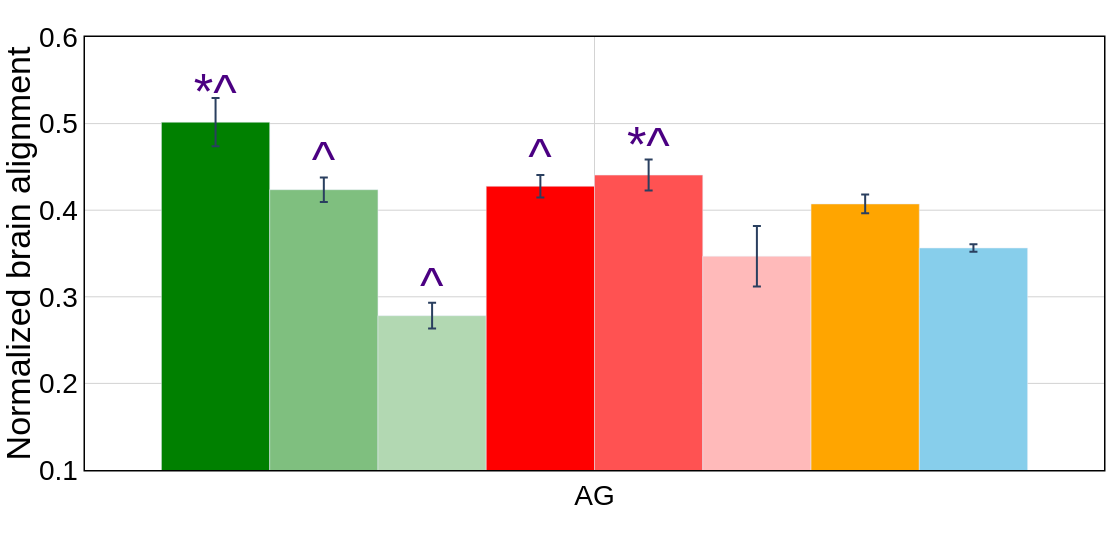

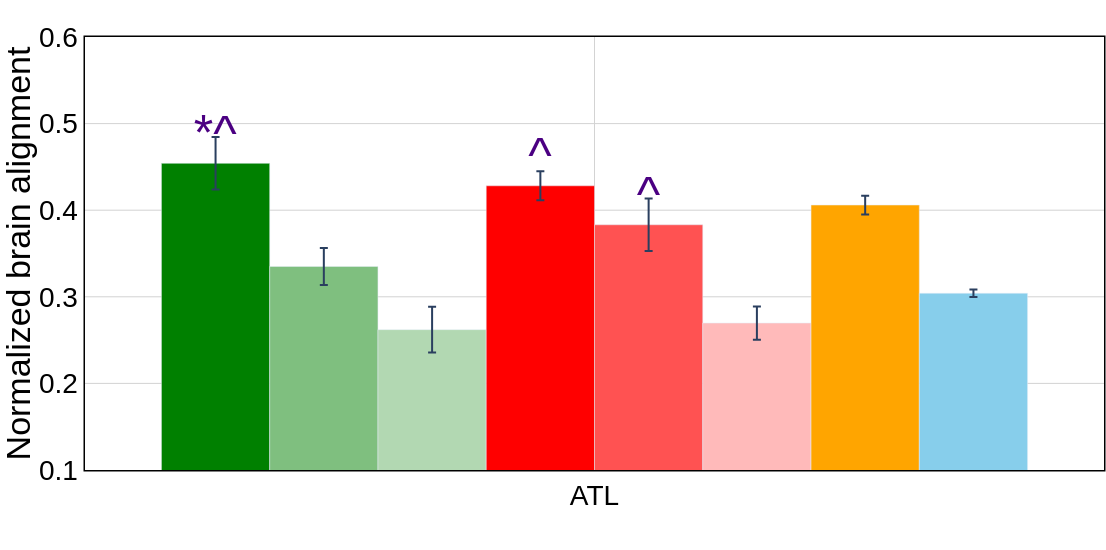

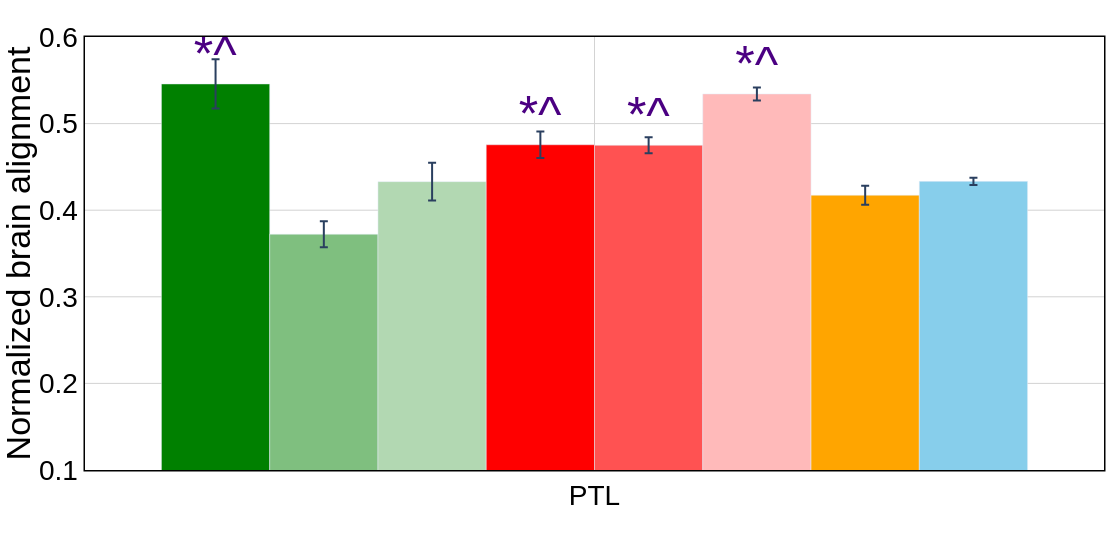

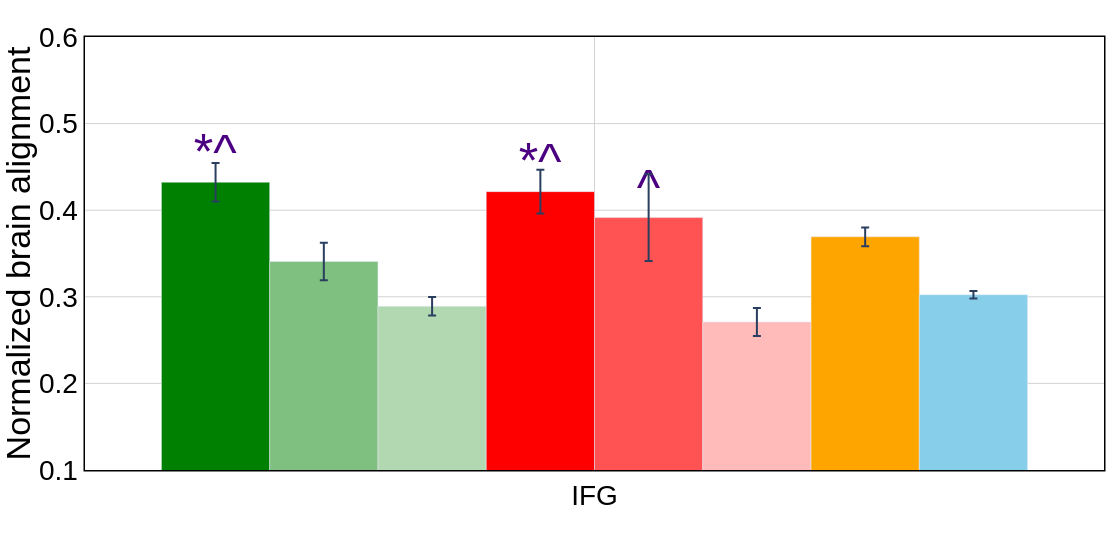

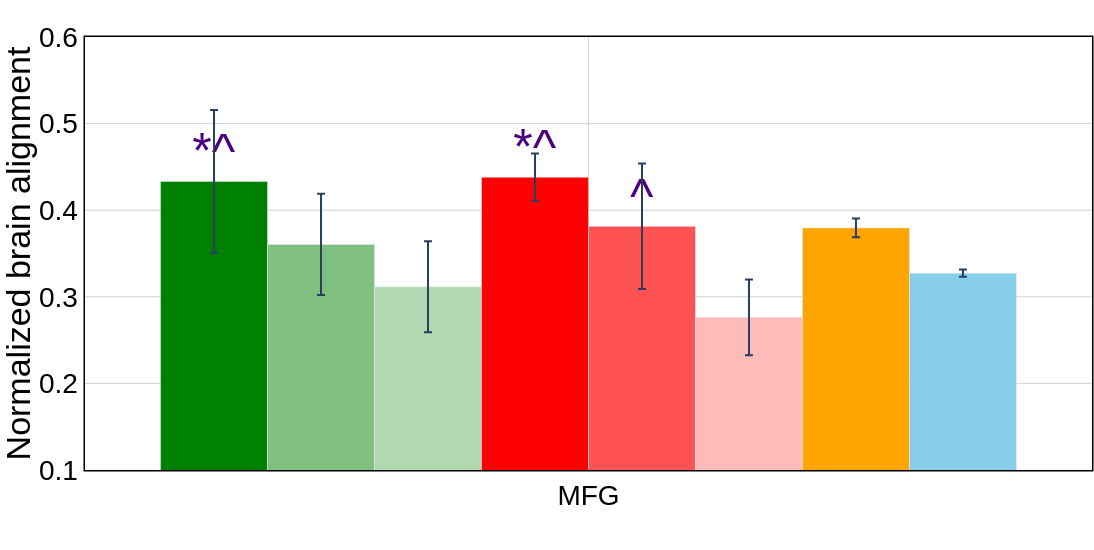

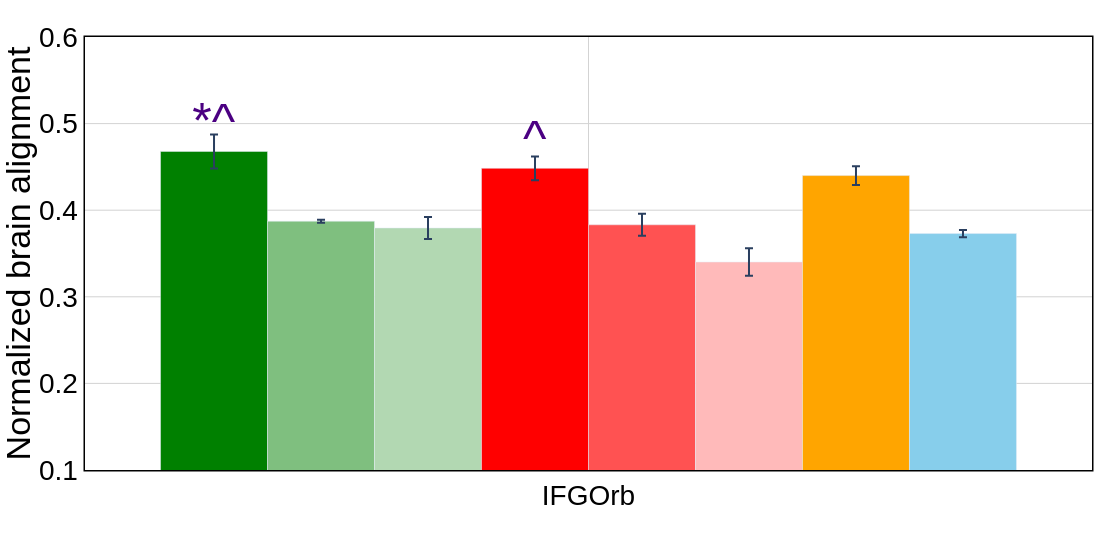

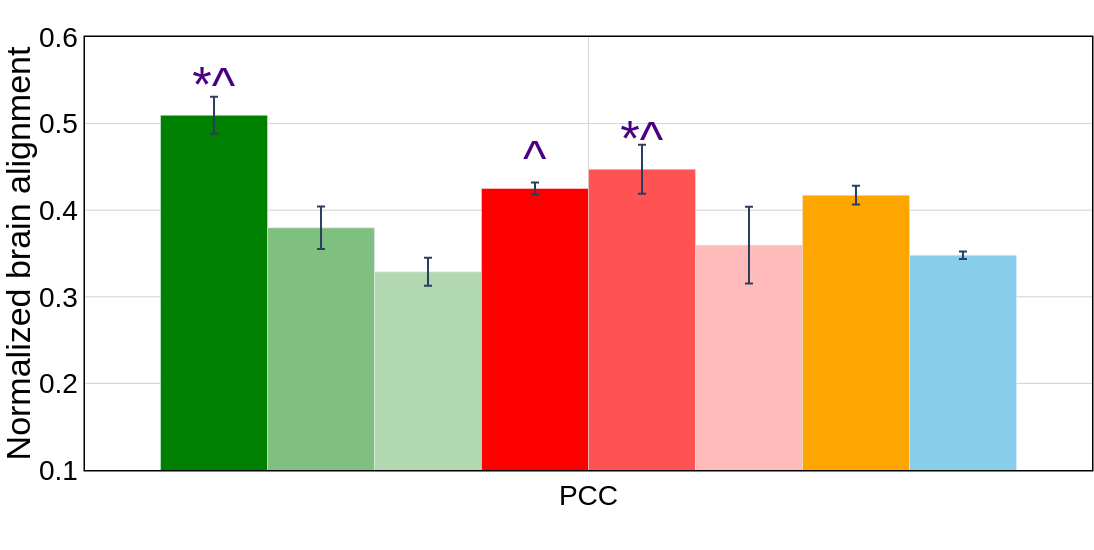

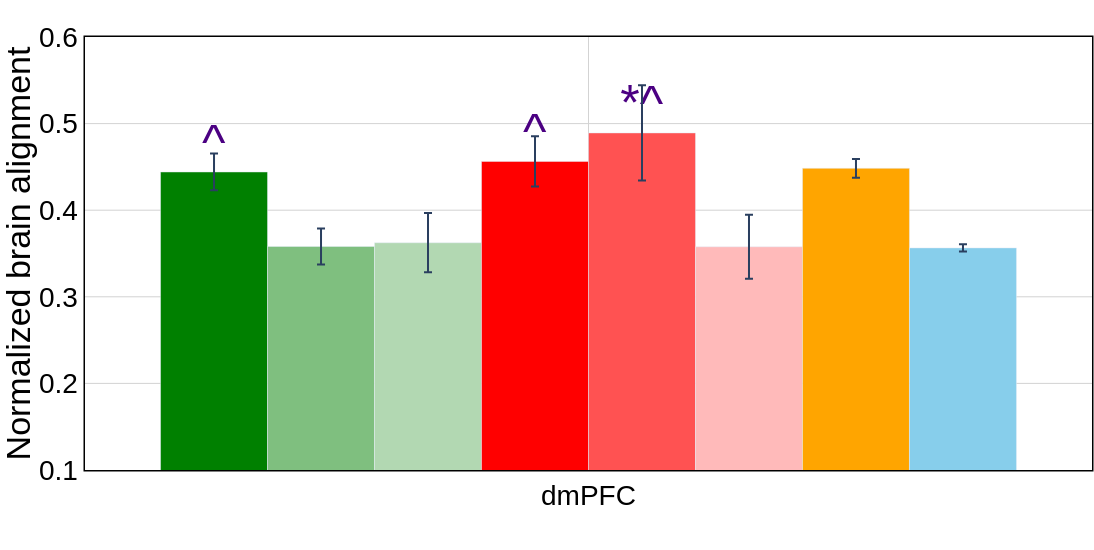

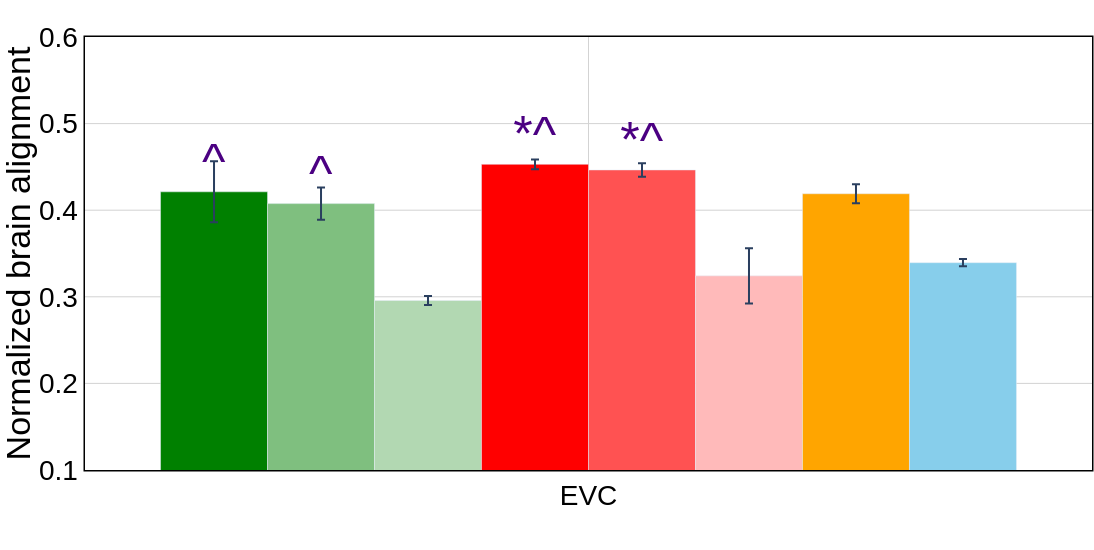

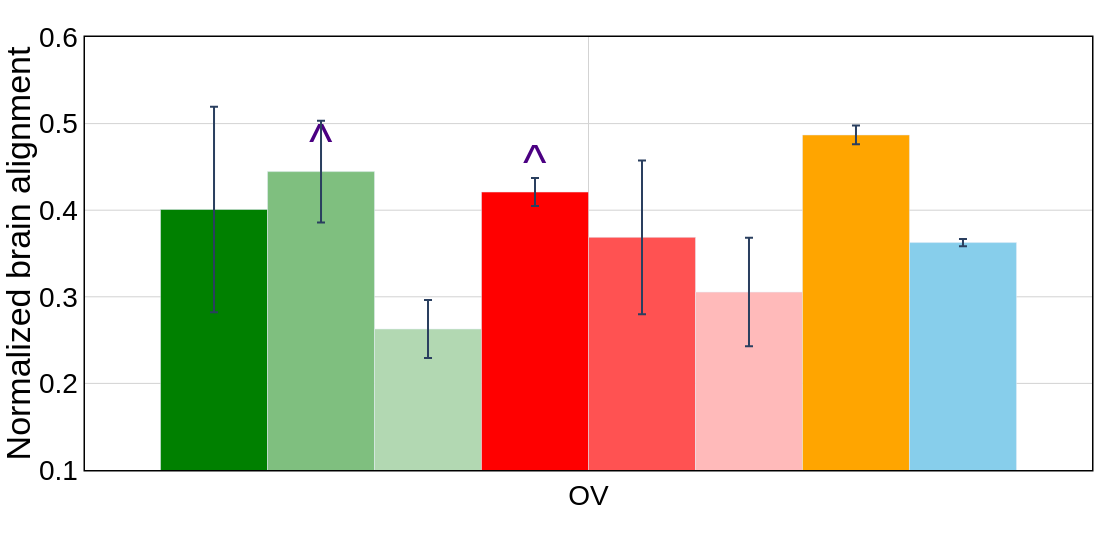

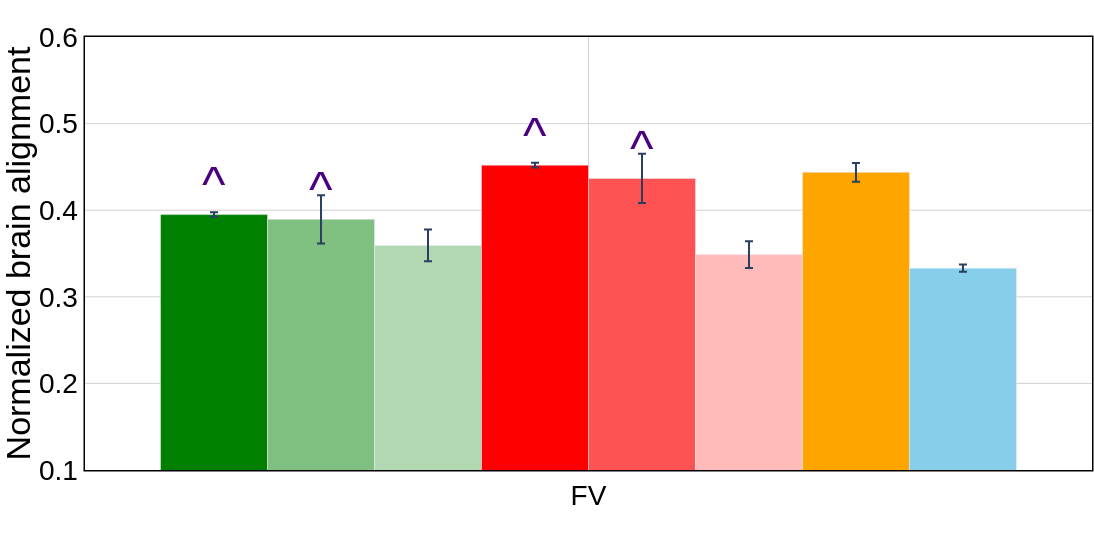

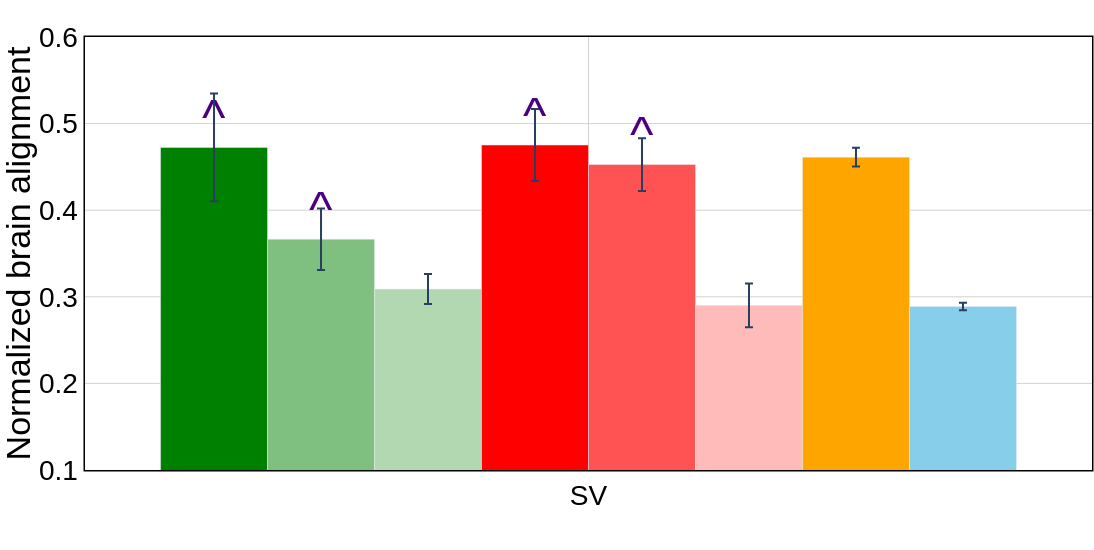

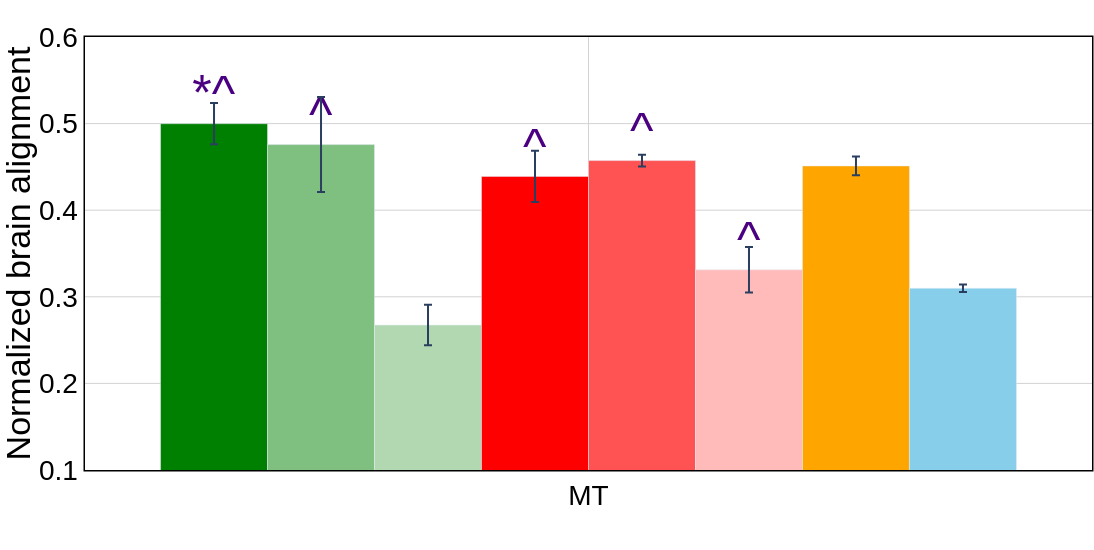

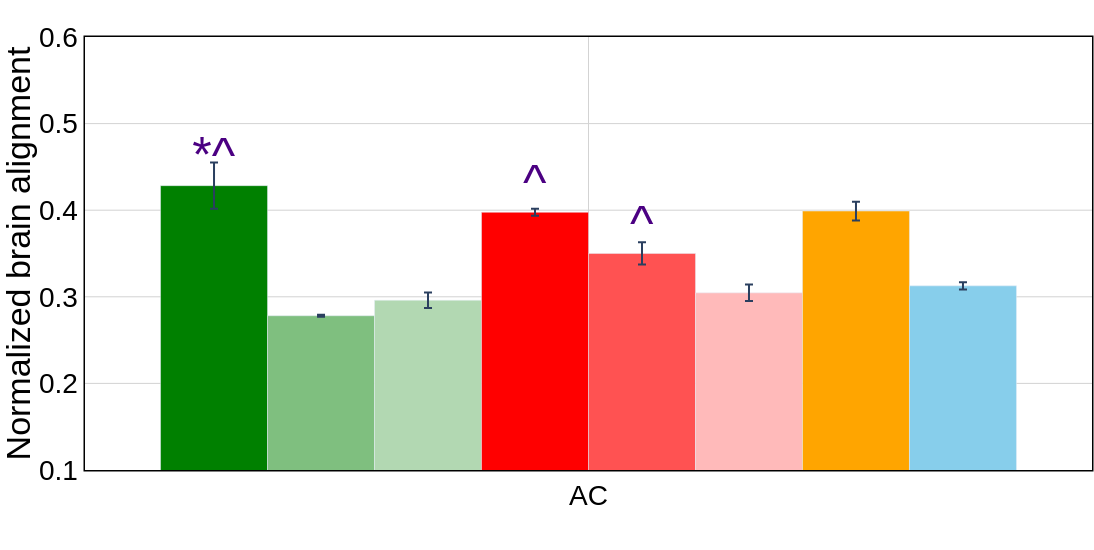

In [157]:
import plotly.graph_objs as go
import plotly
rois = ['AG', 'ATL', 'PTL', 'IFG', 'MFG', 'IFGOrb', 'PCC', 'dmPFC', 'EVC', 'OV', 'FV', 'SV', 'MT', 'AC']
tasks = ['IB Concat','IB Video', 'IB Audio','TVLT Joint','TVLT Video','TVLT Audio','Unimodal VM', 'Unimodal SM']
colors = ['green','#7fbf7f','#b2d8b2','red','#ff5252','#ffbaba','orange','skyblue']
significance = [['*^','^','^','^','*^','','',''],['*^','','','^','^','','',''],
                ['*^','','','*^','*^','*^','',''],['*^','','','*^','^','','',''],
               ['*^','','','*^','^','','',''],['*^','','','^','','','',''],
               ['*^','','','^','*^','','',''],['^','','','^','*^','','',''],
                ['^','^','','*^','*^','','',''],
               ['','^','','^','','','',''],['^','^','','^','^','','',''],
               ['^','^','','^','^','','',''],['*^','^','','^','^','^','',''],['*^','','','^','^','','','']]
for i in np.arange(14):
    ibc = np.mean(normalized_scores_rois[5],axis=0)[i]
    ibv = np.mean(normalized_scores_rois[0],axis=0)[i]
    iba = np.mean(normalized_scores_rois[1],axis=0)[i]
    tvlt = np.mean(np.mean(normalized_scores_vision_rois[3],axis=0),axis=0)[i]
    tvltvideo = np.mean(normalized_scores_rois[2],axis=0)[i]
    tvltaudio = np.mean(normalized_scores_rois[3],axis=0)[i]
    meta =np.mean(normalized_scores_rois[6],axis=0)[i]
    metavideo = np.mean(normalized_scores_rois[7],axis=0)[i]
    metaaudio = np.mean(normalized_scores_rois[8],axis=0)[i]
    vmae = np.mean(np.mean(np.mean(normalized_scores_vision_rois[0:3],axis=2),axis=0),axis=0)[i]
    wav = np.mean(np.mean(np.mean(normalized_scores_speech_rois[0:2],axis=2),axis=0),axis=0)[i]

    values = [ibc, ibv, iba,tvlt, tvltvideo,tvltaudio,vmae,wav]
    stderr = [stats.sem(normalized_scores_rois[5], axis=0, ddof=0)[i],
              stats.sem(normalized_scores_rois[0], axis=0, ddof=0)[i],stats.sem(normalized_scores_rois[1], axis=0, ddof=0)[i],
              stats.sem(np.mean(normalized_scores_vision_rois, axis=2)[3],axis=0, ddof=0)[i],
              stats.sem(normalized_scores_rois[2], axis=0, ddof=0)[i],stats.sem(normalized_scores_rois[3], axis=0, ddof=0)[i],
              stats.sem(np.mean(np.mean(normalized_scores_vision[0:3],axis=0),axis=1),axis=0, ddof=0),
              stats.sem(np.mean(np.mean(normalized_scores_speech[0:2],axis=0),axis=1),axis=0, ddof=0)
              #stats.sem(normalized_scores_rois[6], axis=0, ddof=0)[i],
              #stats.sem(normalized_scores_rois[7], axis=0, ddof=0)[i],stats.sem(normalized_scores_rois[8], axis=0, ddof=0)[i],
              ]
    ranks = [1,4,7,2,5,8, 3,6]
    # Create a bar for each task
    traces = []
    for idx, task in enumerate(tasks):
        traces.append(go.Bar(
            x=[rois[i]],  # Each ROI has its own figure
            y=[values[idx]],
            error_y=dict(
                type='data',  # value of error bar given in data coordinates
                array=[stderr[idx]],
                visible=True
            ),
            name=task,
            marker=dict(color=colors[idx]), legendrank=ranks[idx],
            text=significance[i][idx],textposition='outside',textfont_size=50,textfont_color='indigo'
        ))
    fig = go.Figure(data=traces, layout=layout)
    # trace1 = go.Bar(
    #    x = tasks,
    #    y = values,
    #    error_y=dict(
    #             type='data', # value of error bar given in data coordinates
    #             thickness=2,
    #             width=3,
    #             array=stderr,
    #             visible=True),
    #   #width=0.1,
    #     marker=dict(color=['green','#7fbf7f','#b2d8b2','red','#ff5252','#ffbaba','orange','skyblue']),
    #    name = '',
    #         textposition='outside',textfont_size=30,textfont_color='red'
    # )

    # data = [trace1]
    # layout = go.Layout(barmode = 'group')
    # fig = go.Figure(data = data, layout = layout)
    fig.update_layout(bargap=0.15,bargroupgap=0.0, xaxis_title='',
                       yaxis_title='Normalized brain alignment', width=620,height=550, font=dict(
            size=28,
            color='#000000'
        )
    ,title={
            'text': '',
                           'y':0.99,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'}, plot_bgcolor='rgba(0,0,0,0)',showlegend=False, legend=dict(
        yanchor="top",
        y=1.25,
        xanchor="left",
        x=0.01,
        bgcolor='rgba(0,0,0,0)', orientation="h", 
        font=dict(
                size=21,
            )
    ), margin=go.layout.Margin(
            l=0, #left margin
            r=0, #right margin
            b=0, #bottom margin
            t=37  #top margin
        ))
    fig.update_yaxes(range=[0.1, 0.6], tick0=0.1, dtick=0.1, tickmode = 'linear', showline=True, mirror=True, linewidth=1.5, linecolor='black', gridcolor='lightgray')
    #fig.update_yaxes(ticksuffix="%")
    fig.update_xaxes(tick0=0, showline=True, showticklabels=True, mirror=True, linewidth=1.5, linecolor='black', gridcolor='lightgray')

    plotly.io.write_image(fig, rois[i]+'_brain_normalized_alignment_video_audio_barplot.pdf', format='pdf')
    fig.show()

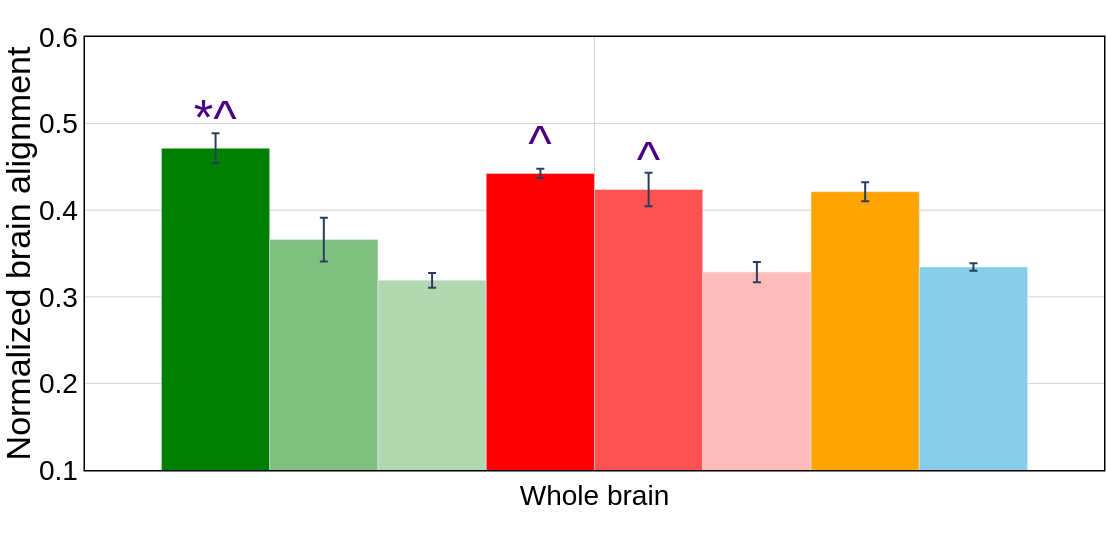

In [158]:
import plotly.graph_objs as go
import plotly
tasks = ['IB Concat','IB Video', 'IB Audio','TVLT Joint','TVLT Video','TVLT Audio','Unimodal VM', 'Unimodal SM']
text = ['*^','','','^','^','','','']
for i in np.arange(1):
    ibc = np.mean(normalized_scores[5],axis=0)[0]
    ibv = np.mean(normalized_scores[0],axis=0)[0]
    iba = np.mean(normalized_scores[1],axis=0)[0]
    tvlt =np.mean(np.mean(normalized_scores_vision[3],axis=0))
    tvltvideo = np.mean(normalized_scores[2],axis=0)[0]
    tvltaudio = np.mean(normalized_scores[3],axis=0)[0]
    meta =np.mean(normalized_scores[6],axis=0)[0]
    metavideo = np.mean(normalized_scores[7],axis=0)[0]
    metaaudio = np.mean(normalized_scores[8],axis=0)[0]
    vmae =np.mean(np.mean(np.mean(normalized_scores_vision[0:3],axis=0),axis=0),axis=0)
    wav = np.mean(np.mean(np.mean(normalized_scores_speech[0:2],axis=2),axis=0),axis=0)
    

    values = [ibc, ibv, iba, tvlt, tvltvideo, tvltaudio,vmae,wav]
    stderr = [stats.sem(normalized_scores[5], axis=0, ddof=0)[0],stats.sem(normalized_scores[0], axis=0, ddof=0)[0],stats.sem(normalized_scores[1], axis=0, ddof=0)[0],
              stats.sem(np.mean(normalized_scores_vision, axis=2),axis=1, ddof=0)[3],
              stats.sem(normalized_scores[2], axis=0, ddof=0)[0],stats.sem(normalized_scores[3], axis=0, ddof=0)[0],
    stats.sem(np.mean(np.mean(normalized_scores_vision[0:3],axis=0),axis=1),axis=0, ddof=0),
    stats.sem(np.mean(np.mean(normalized_scores_speech[0:2],axis=0),axis=1),axis=0, ddof=0)]
              #stats.sem(normalized_scores[6], axis=0, ddof=0)[0],
              #stats.sem(normalized_scores[7], axis=0, ddof=0)[0],stats.sem(normalized_scores[8], axis=0, ddof=0)[0]]

    traces = []
    for idx, task in enumerate(tasks):
        traces.append(go.Bar(
            x=['Whole brain'],  # Each ROI has its own figure
            y=[values[idx]],
            error_y=dict(
                type='data',  # value of error bar given in data coordinates
                array=[stderr[idx]],
                visible=True
            ),
            name=task,
            marker=dict(color=colors[idx]), legendrank=ranks[idx],
            text=text[idx],textposition='outside',textfont_size=50,textfont_color='indigo'
        ))
    fig = go.Figure(data=traces, layout=layout)
    fig.update_layout(bargap=0.15,bargroupgap=0.0, xaxis_title='',
                       yaxis_title='Normalized brain alignment', width=620,height=550, font=dict(
            size=28,
            color='#000000'
        )
    ,title={
            'text': "",
                           'y':0.99,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'}, plot_bgcolor='rgba(0,0,0,0)',showlegend=False, legend=dict(
        yanchor="top",
        y=1.5,
        xanchor="left",
        x=0.01,
        bgcolor='rgba(0,0,0,0)', orientation="h", 
        font=dict(
                size=21,
            )
    ), margin=go.layout.Margin(
            l=0, #left margin
            r=0, #right margin
            b=0, #bottom margin
            t=37  #top margin
        ))
    fig.update_yaxes(range=[0.1, 0.6], tick0=0.1, dtick=0.1, tickmode = 'linear', showline=True, mirror=True, linewidth=1.5, linecolor='black', gridcolor='lightgray')
    #fig.update_yaxes(ticksuffix="%")
    fig.update_xaxes(tick0=0, showline=True, showticklabels=True, mirror=True, linewidth=1.5, linecolor='black', gridcolor='lightgray')

    plotly.io.write_image(fig, 'whole_brain_normalized_alignment_video_audio_barplot.pdf', format='pdf')
    fig.show()

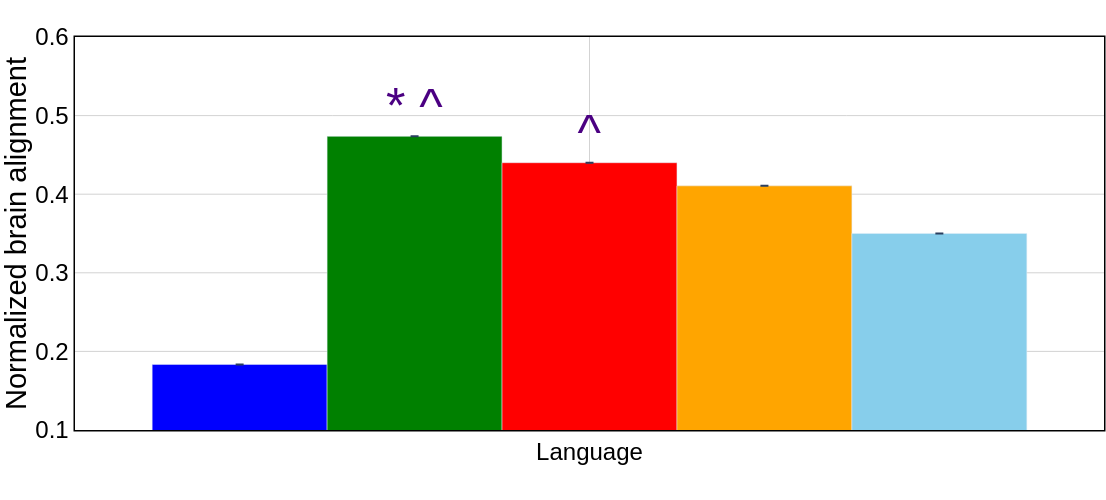

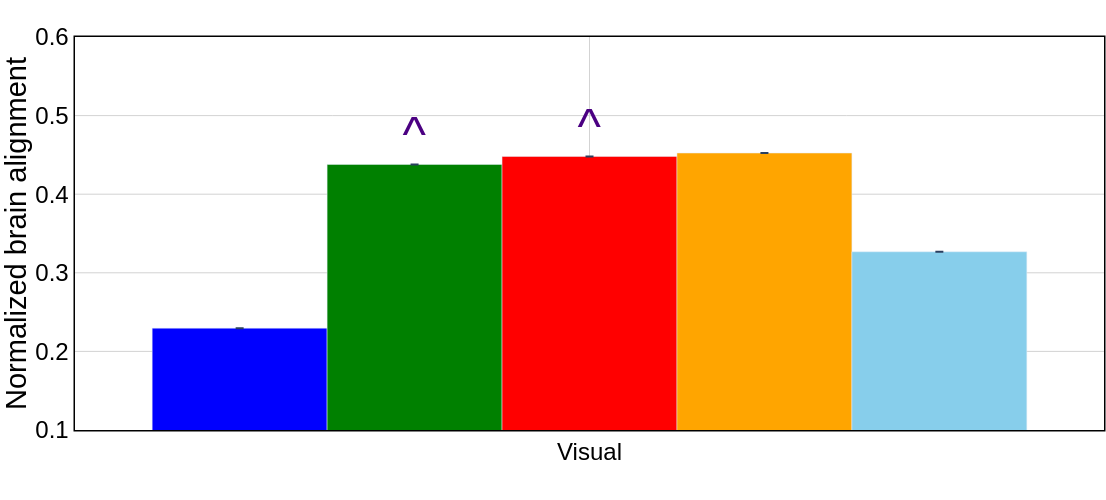

In [154]:
import plotly.graph_objs as go
import plotly
rois = ['Language', 'Visual']
tasks = ['Random','IB Concat','TVLT Joint', 'Unimodal VM', 'Unimodal SM']
indices = [[0,1,2,3,4,5,6,7],[8,9,10,11,12]]
colors=['blue','green','red','orange','skyblue','grey','indigo']
ranks = [1,2,3,4,5]
for i in np.arange(2):
    ran = np.mean(np.mean(normalized_scores_rois[4],axis=0)[indices[i]])
    ibv = np.mean(np.mean(normalized_scores_rois[5],axis=0)[indices[i]])
    tvlt = np.mean(np.mean(np.mean(normalized_scores_vision_rois[3],axis=0),axis=0)[indices[i]])
    #meta =np.mean(normalized_scores_rois[6],axis=0)[i]
    vmae = np.mean(np.mean(np.mean(np.mean(normalized_scores_vision_rois[0:3],axis=2),axis=0),axis=0)[indices[i]])
    wav = np.mean(np.mean(np.mean(np.mean(normalized_scores_speech_rois[0:2],axis=2),axis=0),axis=0)[indices[i]])
    

    values = [ran, ibv, tvlt, vmae, wav]
    stderr = [stats.sem(np.mean(normalized_scores_rois[4][:,indices[i]]), axis=0, ddof=0),
              stats.sem(np.mean(normalized_scores_rois[5][:,indices[i]]), axis=0, ddof=0),
              stats.sem(np.mean(np.mean(normalized_scores_vision_rois, axis=2)[3][:,indices[i]]),axis=0, ddof=0),
              #stats.sem(normalized_scores_rois[6], axis=0, ddof=0)[i],
              stats.sem(np.mean(np.mean(np.mean(normalized_scores_vision_rois[0:3],axis=2),axis=0)[:,indices[i]]), axis=0, ddof=0),
             stats.sem(np.mean(np.mean(np.mean(normalized_scores_speech_rois[0:2],axis=2),axis=0)[:,indices[i]]), axis=0, ddof=0)]

    if 'Language' in rois[i]:
        text=['','* ^','^','','']
    elif 'Visual' in rois[i]:
        text=['','^','^','','']

    traces = []
    for idx, task in enumerate(tasks):
        traces.append(go.Bar(
            x=[rois[i]],  # Each ROI has its own figure
            y=[values[idx]],
            error_y=dict(
                type='data',  # value of error bar given in data coordinates
                array=[stderr[idx]],
                visible=True
            ),
            name=task,
            marker=dict(color=colors[idx]), legendrank=ranks[idx],
            text=text[idx],textposition='outside',textfont_size=50,textfont_color='indigo'
        ))
    fig = go.Figure(data=traces, layout=layout)
    # trace1 = go.Bar(
    #    x = tasks,
    #    y = values,
    #    error_y=dict(
    #             type='data', # value of error bar given in data coordinates
    #             thickness=2,
    #             width=3,
    #             array=stderr,
    #             visible=True),
    #   #width=0.1,
    #     marker=dict(color=['blue','green','red','orange','skyblue','grey','indigo','rgb(231,107,243)', '#8C564B','#ffe4b2','#b2d8b2','cyan','lightblue', 'tan']),
    #      text=text,textposition='outside',textfont_size=30,textfont_color='red'
    # )

    # data = [trace1]
    # layout = go.Layout(barmode = 'group')
    # fig = go.Figure(data = data, layout = layout)

    # Add additional annotations
    # if 'OV' in rois[i]:
    #     for idx, task in enumerate(tasks[1:2]):
    #         fig.add_annotation(
    #             x=task,
    #             y=values[idx+1]+0.1,  # Position the text at half the bar's height
    #             text='',  # Text to display
    #             showarrow=False,
    #             font=dict(size=20, color='blue')
    #         )
    # else:
    #     for idx, task in enumerate(tasks[1:3]):
    #         fig.add_annotation(
    #             x=task,
    #             y=values[idx+1]+0.1,  # Position the text at half the bar's height
    #             text='x',  # Text to display
    #             showarrow=False,
    #             font=dict(size=20, color='blue')
    #         )
    
    fig.update_layout(bargap=0.15,bargroupgap=0.0, xaxis_title='',
                       yaxis_title='Normalized brain alignment', width=500,height=500, font=dict(
            size=24,
            color='#000000'
        )
    ,title={
            'text': '',
                           'y':0.99,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'}, plot_bgcolor='rgba(0,0,0,0)',showlegend=False, legend=dict(
        yanchor="top",
        y=1.5,
        xanchor="left",
        x=0.01,
        bgcolor='rgba(0,0,0,0)', orientation="h", 
        font=dict(
                size=20,
            )
    ), margin=go.layout.Margin(
            l=0, #left margin
            r=0, #right margin
            b=0, #bottom margin
            t=37  #top margin
        ))
    fig.update_yaxes(range=[0.1, 0.6], tick0=0.1, dtick=0.1, tickmode = 'linear', showline=True, mirror=True, linewidth=1.5, linecolor='black', gridcolor='lightgray')
    #fig.update_yaxes(ticksuffix="%")
    fig.update_xaxes(tick0=0, showline=True, showticklabels=True, mirror=True, linewidth=1.5, linecolor='black', gridcolor='lightgray')

    plotly.io.write_image(fig, rois[i]+'_brain_normalized_alignment_barplot.pdf', format='pdf')
    fig.show()

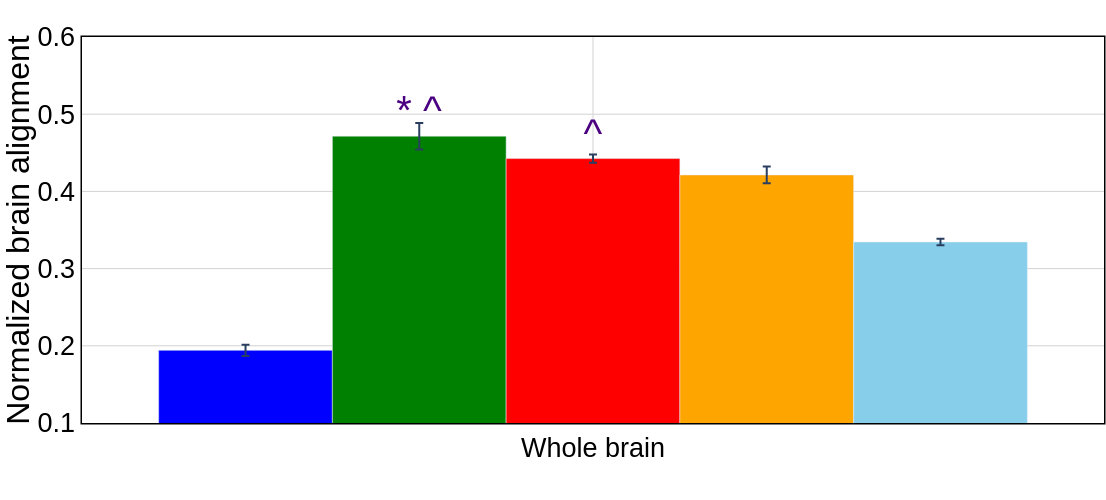

In [153]:
import plotly.graph_objs as go
import plotly
rois = ['Whole brain']
tasks = ['Random','IB Concat','TVLT Joint', 'Unimodal VM', 'Unimodal SM']
colors=['blue','green','red','orange','skyblue','grey','indigo']
for i in np.arange(1):
    ran = np.mean(normalized_scores[4],axis=0)[0]
    ibv = np.mean(normalized_scores[5],axis=0)[0]
    tvlt =np.mean(np.mean(normalized_scores_vision[3],axis=0))
    #meta =np.mean(normalized_scores[6],axis=0)[0]
    vmae =np.mean(np.mean(np.mean(normalized_scores_vision[0:3],axis=0),axis=0),axis=0)
    wav = np.mean(np.mean(np.mean(normalized_scores_speech[0:2],axis=2),axis=0),axis=0)
    

    values = [ran, ibv, tvlt, vmae,  wav]
    stderr = [stats.sem(normalized_scores[4], axis=0, ddof=0)[0],stats.sem(normalized_scores[5], axis=0, ddof=0)[0],
              stats.sem(np.mean(normalized_scores_vision, axis=2),axis=1, ddof=0)[3],
              #stats.sem(normalized_scores[6], axis=0, ddof=0)[0],
              stats.sem(np.mean(np.mean(normalized_scores_vision[0:3],axis=0),axis=1),axis=0, ddof=0),
              stats.sem(np.mean(np.mean(normalized_scores_speech[0:2],axis=0),axis=1),axis=0, ddof=0)]
    text=['','* ^','^','','','']

    ranks = [1,4,2,5,3,6]
    # Create a bar for each task
    traces = []
    for idx, task in enumerate(tasks):
        traces.append(go.Bar(
            x=[rois[i]],  # Each ROI has its own figure
            y=[values[idx]],
            error_y=dict(
                type='data',  # value of error bar given in data coordinates
                array=[stderr[idx]],
                visible=True
            ),
            name=task,
            marker=dict(color=colors[idx]), legendrank=ranks[idx],
            text=text[idx],textposition='outside',textfont_size=40,textfont_color='indigo'
        ))
    fig = go.Figure(data=traces, layout=layout)
    
    fig.update_layout(bargap=0.15,bargroupgap=0.0, xaxis_title='',
                       yaxis_title='Normalized brain alignment', width=500,height=500, font=dict(
            size=27,
            color='#000000'
        )
    ,title={
            'text': '',
                           'y':0.99,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'}, plot_bgcolor='rgba(0,0,0,0)',showlegend=False, legend=dict(
        yanchor="top",
        y=1.18,
        xanchor="left",
        x=0.01,
        bgcolor='rgba(0,0,0,0)', orientation="h", 
        font=dict(
                size=24,
            )
    ), margin=go.layout.Margin(
            l=0, #left margin
            r=0, #right margin
            b=0, #bottom margin
            t=37  #top margin
        ))
    fig.update_yaxes(range=[0.1, 0.6], tick0=0.1, dtick=0.1, tickmode = 'linear', showline=True, mirror=True, linewidth=1.5, linecolor='black', gridcolor='lightgray')
    #fig.update_yaxes(ticksuffix="%")
    fig.update_xaxes(tick0=0, showline=True, showticklabels=True, mirror=True, linewidth=1.5, linecolor='black', gridcolor='lightgray')

    plotly.io.write_image(fig, rois[i]+'_brain_normalized_alignment_barplot.pdf', format='pdf')
    fig.show()